## Import Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [3]:
df = pd.read_csv('telco_data_clean.csv', index_col=False)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,monthly_charges_cat,tenure_year
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low Expense,1
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Medium Expense,3
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Medium Expense,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Medium Expense,4
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Medium High Expense,1


In [4]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn',
       'monthly_charges_cat', 'tenure_year'],
      dtype='object')

# 4.EDA

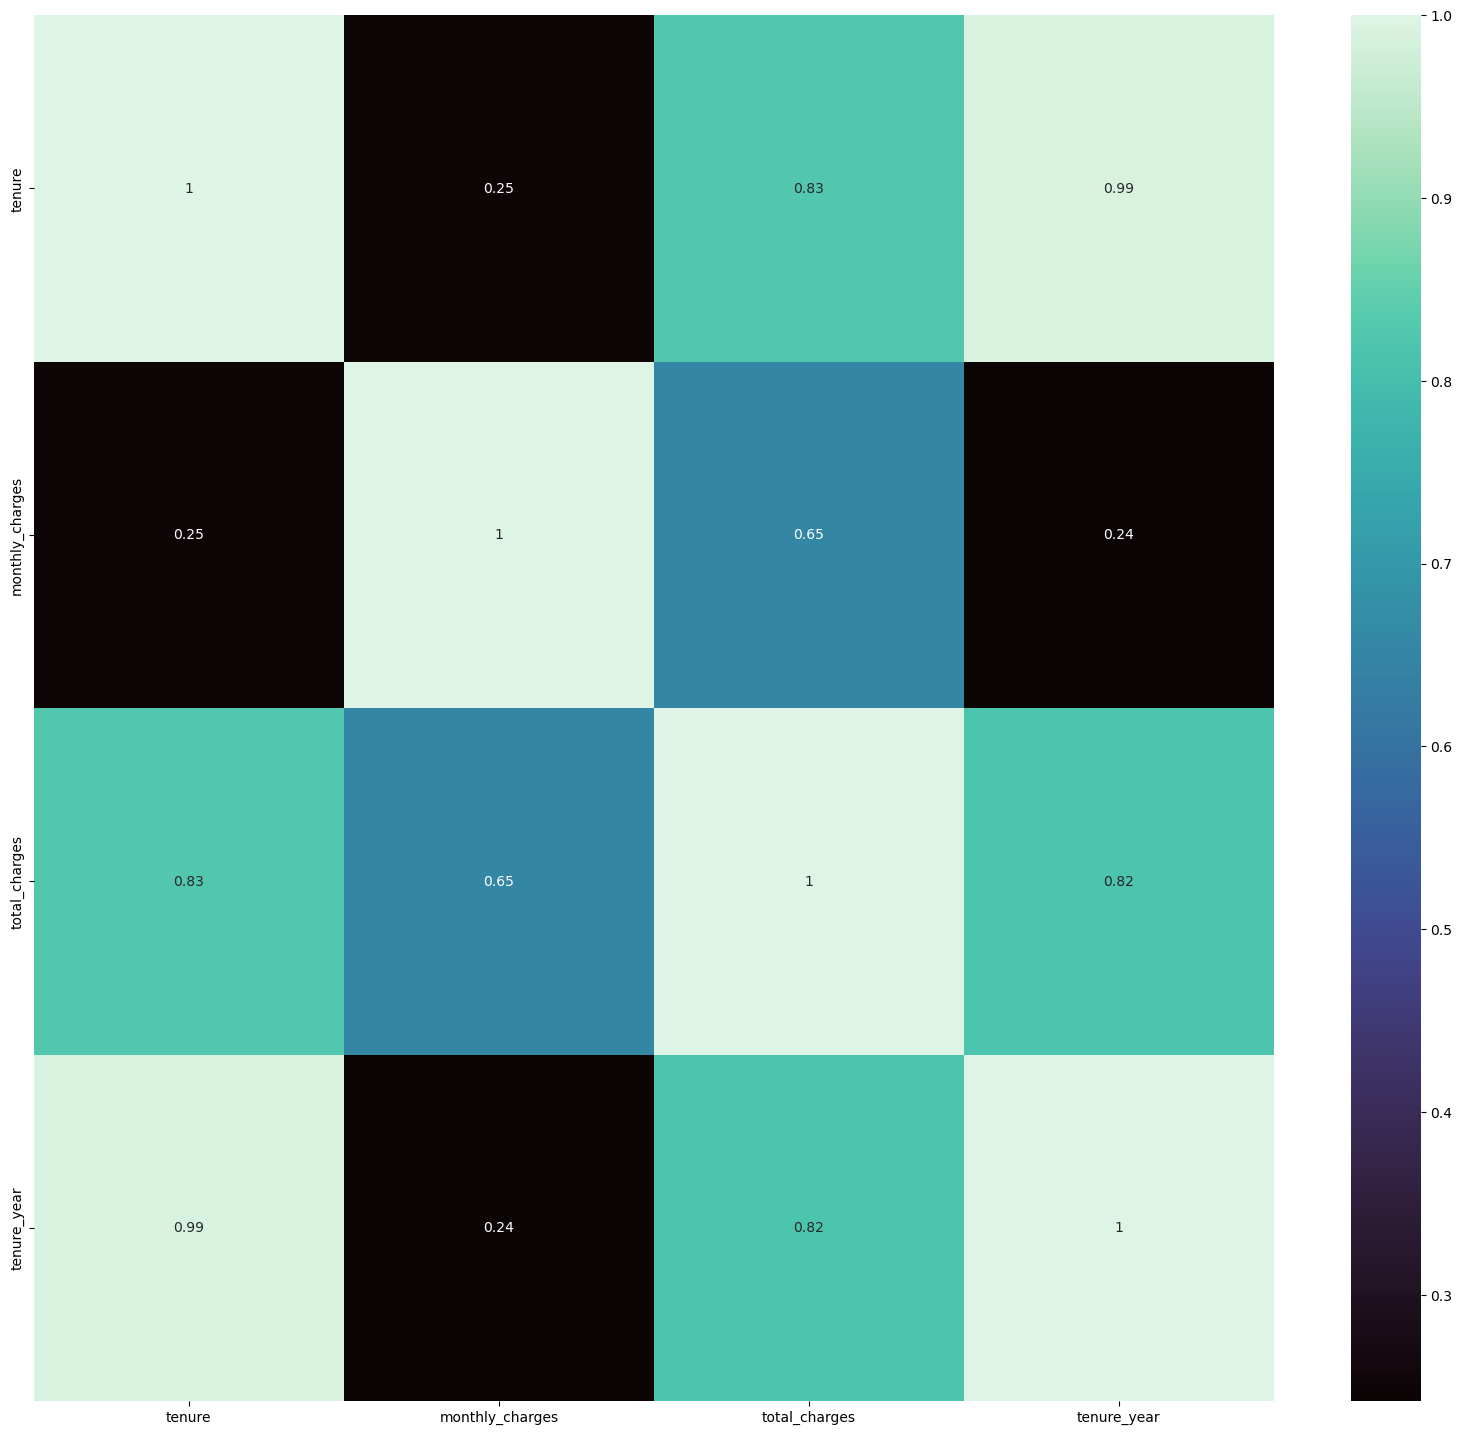

In [5]:
corr = df.corr()

plt.figure(figsize=(20,18))
sns.heatmap(corr, annot=True, cmap="mako")
plt.show()

## 4.1 EDA kolom target (Churn)

In [6]:
target = df["churn"].value_counts().reset_index()
persen = df["churn"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["churn"]
target

,index,churn,percentage
0,No,5163,0.734215
1,Yes,1869,0.265785


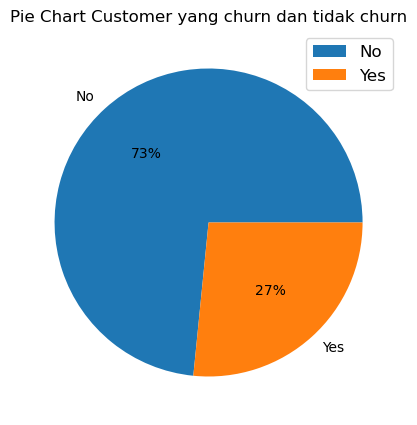

In [7]:
plt.figure(figsize=(7,5))


#sns.barplot(target["index"], target["percentage"])
plt.pie(target["percentage"], labels = target["index"], autopct='%.0f%%')
plt.title("Pie Chart Customer yang churn dan tidak churn")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

Dari plot diatas ditemukan bahwa dari keseluruhan jumlah customer yang churn adalah sebesar 27% (1869 customer),dan customer yang tidak churn / stay adalah 73% (5163 customer) 

In [8]:
churned = df[df['churn'] == 'Yes']
non_churned = df[df['churn'] == 'No']

## 4.2 EDA Kolom Numerikal

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7032 non-null   object 
 1   senior_citizen       7032 non-null   object 
 2   partner              7032 non-null   object 
 3   dependents           7032 non-null   object 
 4   tenure               7032 non-null   int64  
 5   phone_service        7032 non-null   object 
 6   multiple_lines       7032 non-null   object 
 7   internet_service     7032 non-null   object 
 8   online_security      7032 non-null   object 
 9   online_backup        7032 non-null   object 
 10  device_protection    7032 non-null   object 
 11  tech_support         7032 non-null   object 
 12  streaming_tv         7032 non-null   object 
 13  streaming_movies     7032 non-null   object 
 14  contract             7032 non-null   object 
 15  paperless_billing    7032 non-null   o

### 4.2.1 EDA Numerikal Tenure dan Tenure Year

Berikut adalah meaning dari kolom tenure_year

|Value| Meaning|
|---|---|
|1| 0 -12 Bulan|
|2| 13-24 Bulan|
|3| 24-36 Bulan|
|4| 37-48 Bulan|
|5| 49-60 bulan|
|6| 60-72 Bulan|

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


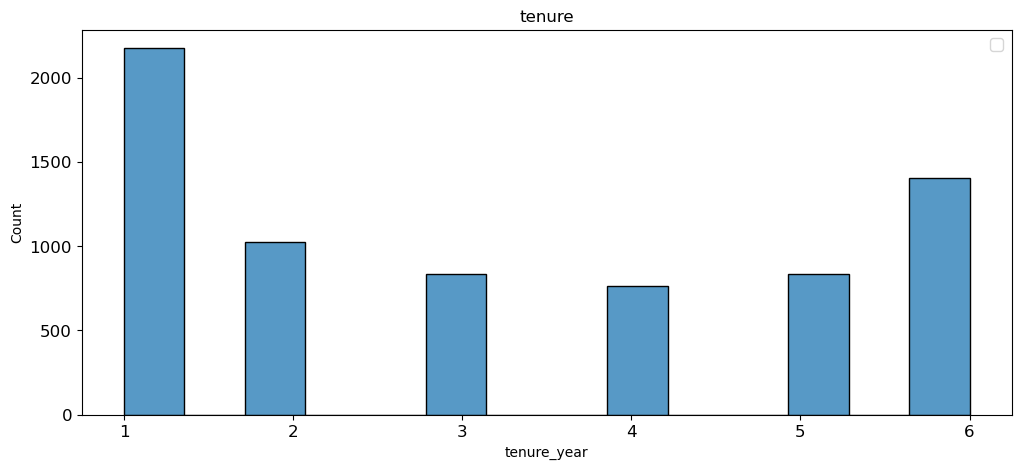

In [10]:
plt.figure(figsize=(12,5))


sns.histplot(df["tenure_year"])
plt.title("tenure")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [11]:
# Menghitung value count untuk setiap kombinasi 'Education' dan 'LeaveOrNot'
value_counts = df.groupby(['tenure_year', 'churn']).size().reset_index(name='Count')

# Menampilkan hasil value count
value_counts


,tenure_year,churn,Count
0,1,No,1138
1,1,Yes,1037
2,2,No,730
3,2,Yes,294
4,3,No,652
5,3,Yes,180
6,4,No,617
7,4,Yes,145
8,5,No,712
9,5,Yes,120


In [12]:
value_counts.groupby('tenure_year')['Count'].sum()

tenure_year
1    2175
2    1024
3     832
4     762
5     832
6    1407
Name: Count, dtype: int64

In [13]:
a = [2175,2175,1024,1024,832,832,762,762,832,832,1407,1407]

In [14]:
value_counts['percentage'] = value_counts['Count'] / a * 100

In [15]:
value_counts

,tenure_year,churn,Count,percentage
0,1,No,1138,52.321839
1,1,Yes,1037,47.678161
2,2,No,730,71.289062
3,2,Yes,294,28.710938
4,3,No,652,78.365385
5,3,Yes,180,21.634615
6,4,No,617,80.971129
7,4,Yes,145,19.028871
8,5,No,712,85.576923
9,5,Yes,120,14.423077


In [16]:
print("Nilai maksimum dari tenure adalah : ",df["tenure_year"].max())
print("Nilai minimum dari tenure adalah : ",df["tenure_year"].min())
print("Nilai rata-rata dari tenure adalah : ",df["tenure_year"].mean())
print("Nilai rata-rata dari tenure adalah : ",df["tenure_year"].value_counts())

Nilai maksimum dari tenure adalah :  6
Nilai minimum dari tenure adalah :  1
Nilai rata-rata dari tenure adalah :  3.181029579067122
Nilai rata-rata dari tenure adalah :  1    2175
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_year, dtype: int64


Customer yang paling banyak adalah customer pada kelompok ke 1, dan yang paling sedikit adalah customer pada kelompok 4.

Text(0.5, 1.0, 'Tenure vs Customer Churn')

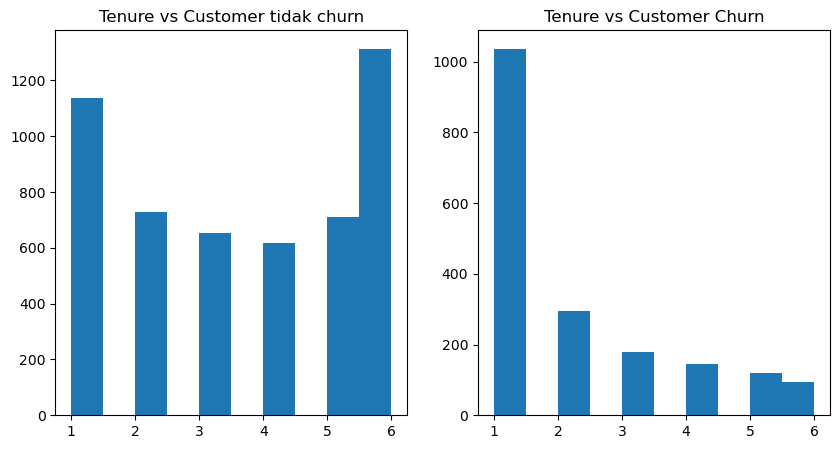

In [17]:
no_churn = df[df["churn"] == 'No']["tenure_year"].reset_index()
churns = df[df["churn"] == 'Yes']["tenure_year"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
axes[0].hist(no_churn["tenure_year"])
axes[0].set_title("Tenure vs Customer tidak churn")
axes[1].hist(churns["tenure_year"])
axes[1].set_title("Tenure vs Customer Churn")

In [18]:
target = df["churn"].value_counts().reset_index()
persen = df["churn"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["churn"]
target

,index,churn,percentage
0,No,5163,0.734215
1,Yes,1869,0.265785


In [19]:
print("tenure terbanyak vs customer tidak churn adalah : ",no_churn["tenure_year"].value_counts())
print("")

print("Tenure terbanyak vs customer churn adalah : ",churns["tenure_year"].value_counts())

tenure terbanyak vs customer tidak churn adalah :  6    1314
1    1138
2     730
5     712
3     652
4     617
Name: tenure_year, dtype: int64

Tenure terbanyak vs customer churn adalah :  1    1037
2     294
3     180
4     145
5     120
6      93
Name: tenure_year, dtype: int64


Dari plot di atas diketahui bahwa customer yang paling banyak churn adalah pada customer pada kelompok 1 (0-12 bulan), dan customer yang tidak churn terbanyak pada kelompok 6 (61-72bulan).

### 4.2.2 EDA Numerikal Monthly_Charges dan Monthly Charge Cat

Berikut adalah penjelasan dari kolom monthly charge cat , satuan currency dari data tersebut adalah $

|Value| Meaning ($)|
|---|---|
|Low Expense| 0 - 30|
|Medium Expense| 31-60|
|Medium High Expense| 61-90|
|High Expense| 91-120|

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


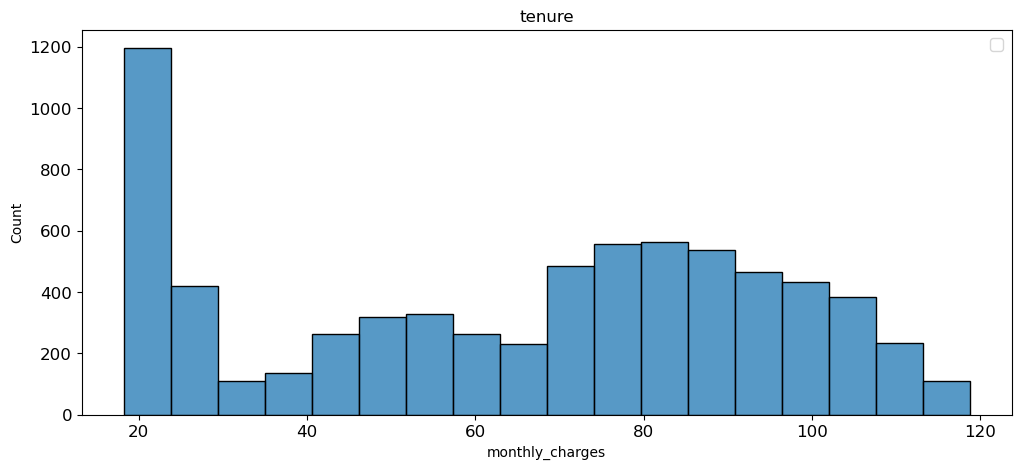

In [20]:
plt.figure(figsize=(12,5))


sns.histplot(df["monthly_charges"])
plt.title("tenure")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

In [21]:
print("Nilai maksimum dari monthly_charges adalah : ",df["monthly_charges"].max())
print("Nilai minimum dari monthly_charges adalah : ",df["monthly_charges"].min())
print("Nilai rata-rata dari monthly_charges adalah : ",df["monthly_charges"].mean())

Nilai maksimum dari monthly_charges adalah :  118.75
Nilai minimum dari monthly_charges adalah :  18.25
Nilai rata-rata dari monthly_charges adalah :  64.79820819112628


Text(0.5, 1.0, 'Monthly charges vs Churn')

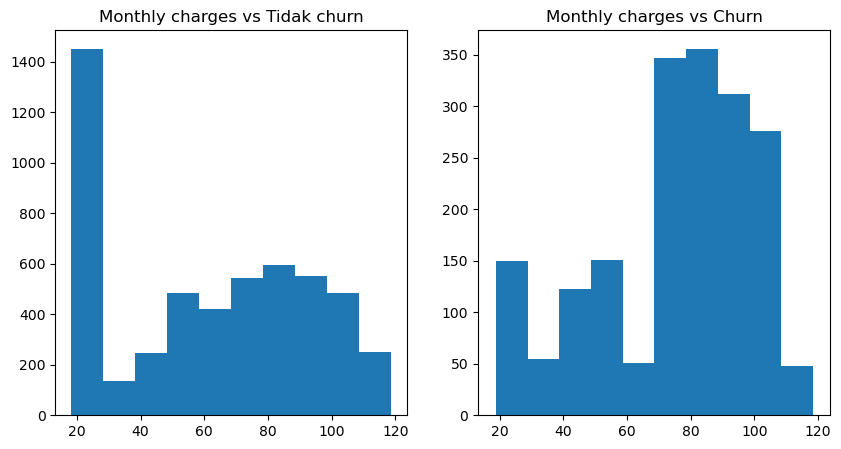

In [22]:
month_nochurn = df[df["churn"] == 'No']["monthly_charges"].reset_index()
month_churn = df[df["churn"] == 'Yes']["monthly_charges"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
axes[0].hist(month_nochurn["monthly_charges"])
axes[0].set_title("Monthly charges vs Tidak churn")
axes[1].hist(month_churn["monthly_charges"])
axes[1].set_title("Monthly charges vs Churn")

In [23]:
print("Nilai rata-rata dari monthly_charges vs customer tidak churn adalah : ",month_nochurn["monthly_charges"].mean())
print("monthly_charges vs customer tidak churn adalah : ",month_nochurn["monthly_charges"].value_counts())
print("")
print("Nilai rata-rata dari monthly_charges vs customer churn adalah : ",month_churn["monthly_charges"].mean())
print("monthly_charges vs customer churn adalah : ",month_churn["monthly_charges"].value_counts())

Nilai rata-rata dari monthly_charges vs customer tidak churn adalah :  61.307408483439865
monthly_charges vs customer tidak churn adalah :  20.05     58
19.95     41
19.90     40
19.70     40
19.85     39
          ..
113.00     1
68.35      1
107.65     1
84.55      1
78.70      1
Name: monthly_charges, Length: 1459, dtype: int64

Nilai rata-rata dari monthly_charges vs customer churn adalah :  74.44133226324237
monthly_charges vs customer churn adalah :  74.40    13
74.90     9
74.95     8
45.30     8
70.15     7
         ..
29.50     1
24.60     1
68.25     1
87.45     1
44.20     1
Name: monthly_charges, Length: 910, dtype: int64


Dalam grafik di atas diketahui bahwa customer yang churn adalah customer yang membayar tagihan bulanan sebesar $74.40

In [24]:
df.groupby(['churn']).agg(loss=('monthly_charges', 'sum')).sort_values(by=['loss'], ascending=False)

,loss
churn,
No,316530.15
Yes,139130.85


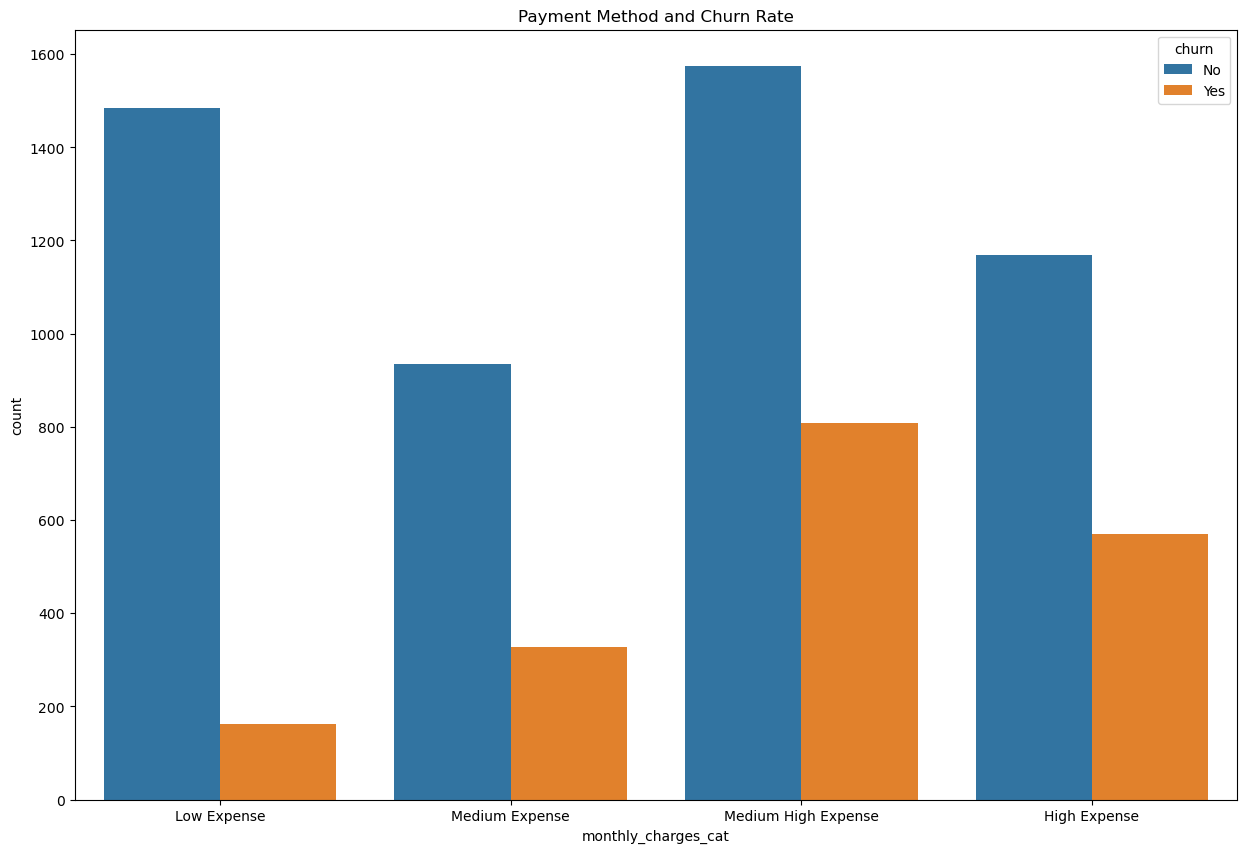

In [25]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'monthly_charges_cat', hue = 'churn')
plt.title('Payment Method and Churn Rate')
plt.show()

In [100]:
value_counts = df.groupby(['monthly_charges_cat', 'churn']).size().reset_index(name='Count')
print(value_counts)

   monthly_charges_cat churn  Count
0         High Expense    No   1169
1         High Expense   Yes    570
2          Low Expense    No   1485
3          Low Expense   Yes    162
4       Medium Expense    No    935
5       Medium Expense   Yes    328
6  Medium High Expense    No   1574
7  Medium High Expense   Yes    809


Dari grafik di atas dapat dilihat bahwa churn paling tinggi pada montly charge ada pada medium high expense atau monthly charge sebesar 61 $ sampai 90 $ per bulan. untuk mengatasi hal ini bisa diberikan penawaran dan layanan yang lebih personal untuk meningkatkan retensi, terutama pada pelanggan dengan biaya bulanan medium high expense, dan high expense

### 4.2.3 EDA Numerikal Total_Charges

Text(0.5, 1.0, 'Total charges vs Churn')

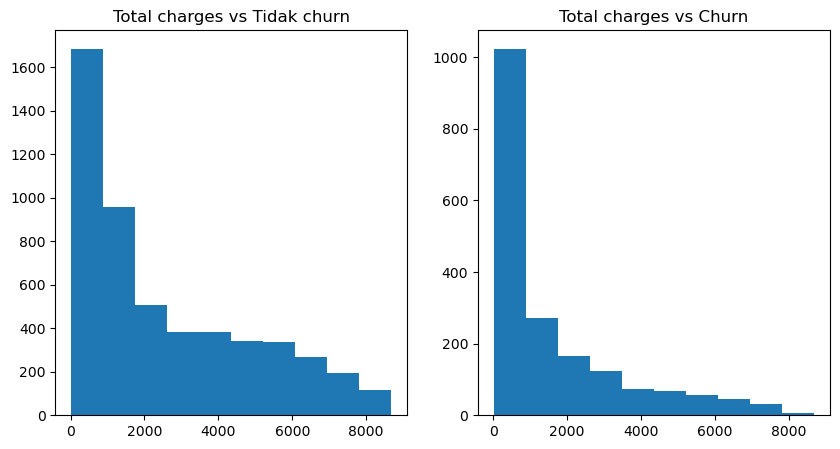

In [26]:
total_nochurn = df[df["churn"] == 'No']["total_charges"].reset_index()
total_churn = df[df["churn"] == 'Yes']["total_charges"].reset_index()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
axes[0].hist(total_nochurn["total_charges"])
axes[0].set_title("Total charges vs Tidak churn")
axes[1].hist(total_churn["total_charges"])
axes[1].set_title("Total charges vs Churn")

In [27]:
print("Nilai rata-rata dari total_charges vs customer tidak churn adalah : ",total_nochurn["total_charges"].mean())
print("total_charges vs customer tidak churn adalah : ",total_nochurn["total_charges"].value_counts())
print("")
print("Nilai rata-rata dari total_charges vs customer churn adalah : ",total_churn["total_charges"].mean())
print("total_charges vs customer churn adalah : ",total_churn["total_charges"].value_counts())

Nilai rata-rata dari total_charges vs customer tidak churn adalah :  2555.344141003293
total_charges vs customer tidak churn adalah :  19.75      7
19.65      6
19.55      6
20.05      6
20.45      5
          ..
2117.20    1
203.95     1
6849.40    1
85.50      1
6844.50    1
Name: total_charges, Length: 4965, dtype: int64

Nilai rata-rata dari total_charges vs customer churn adalah :  1531.7960941680042
total_charges vs customer churn adalah :  20.20      6
45.30      5
69.65      4
20.15      4
19.90      4
          ..
1445.30    1
141.45     1
512.45     1
777.30     1
306.60     1
Name: total_charges, Length: 1732, dtype: int64


Dari data di atas diketahui bahwa mayoritas orang yang churn adalah customer yang total chargesnya tergolong kecil itu dikarenakan tenure customer yang churn adalah pada kelompok 1

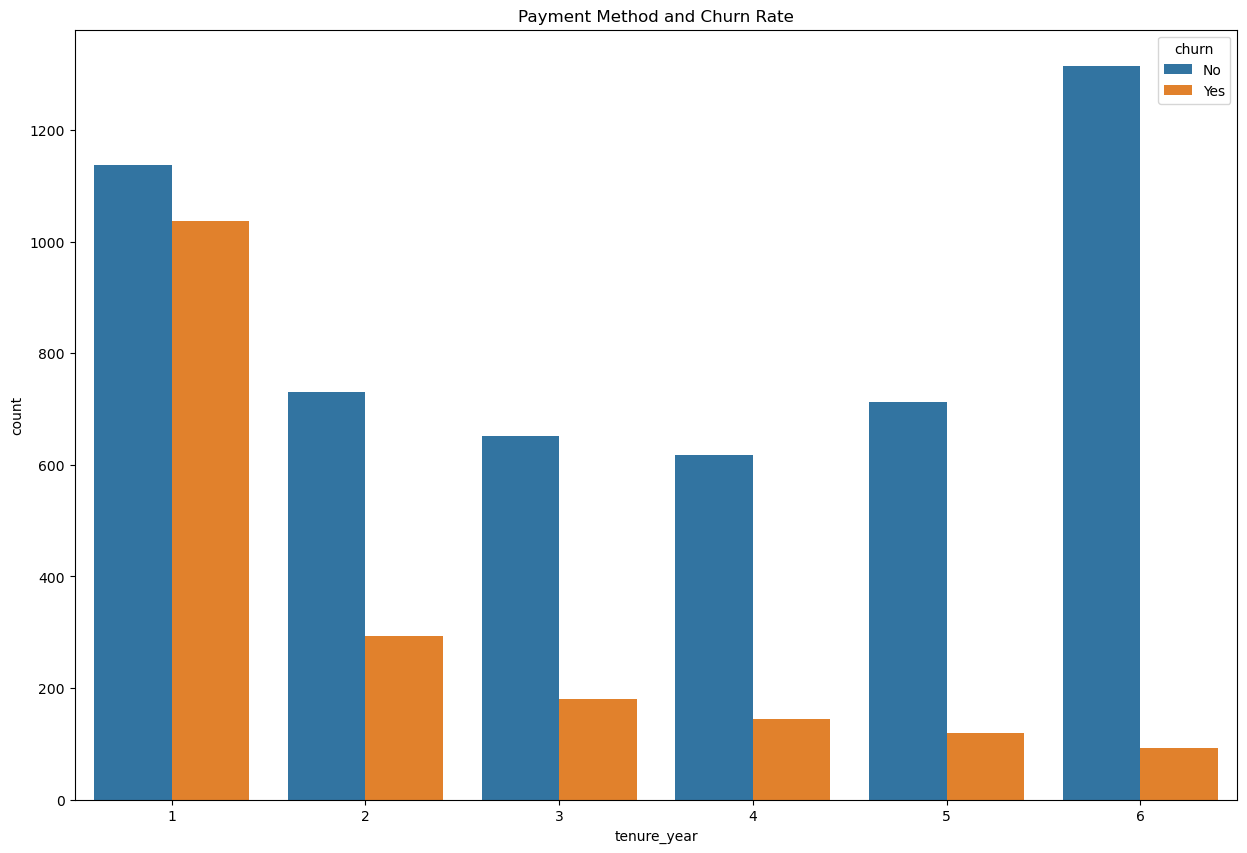

In [28]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'tenure_year', hue = 'churn')
plt.title('Payment Method and Churn Rate')
plt.show()

In [101]:
value_counts = df.groupby(['tenure_year', 'churn']).size().reset_index(name='Count')
print(value_counts)

    tenure_year churn  Count
0             1    No   1138
1             1   Yes   1037
2             2    No    730
3             2   Yes    294
4             3    No    652
5             3   Yes    180
6             4    No    617
7             4   Yes    145
8             5    No    712
9             5   Yes    120
10            6    No   1314
11            6   Yes     93


Dari data di atas dapat dilihat pelanggan dengan tenure 1 tahun memiliki tingkat churn yang hampir sebanding dengan yang tidak churn (1037 vs. 1138). Mungkin ada faktor tertentu yang mempengaruhi keputusan pelanggan untuk tetap atau keluar pada tahun pertama. Dapat diamati bahwa seiring bertambahnya masa penggunaan (tenure), tingkat churn cenderung menurun. Pelanggan dengan masa penggunaan lebih lama cenderung lebih setia.

## 4.3 EDA Kolom Kategorial

### 4.3.1 EDA Kolom Gender

In [29]:
target = df["gender"].value_counts().reset_index()
persen = df["gender"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["gender"]
target

,index,gender,percentage
0,Male,3549,0.504693
1,Female,3483,0.495307


Text(0.5, 1.0, 'Gender Distributionn')

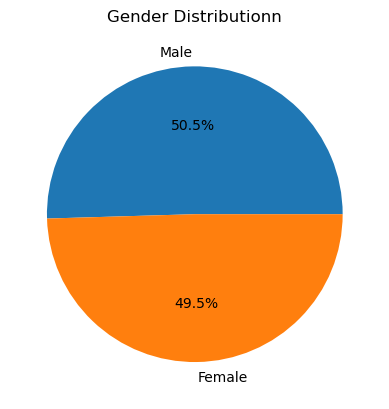

In [30]:
plt.pie(x = df['gender'].value_counts(), labels = df['gender'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Gender Distributionn")

Diketahui pada dataset ini gender di dominasi tipis oleh Male (50,5%), dan sisanya Female (49,5%)

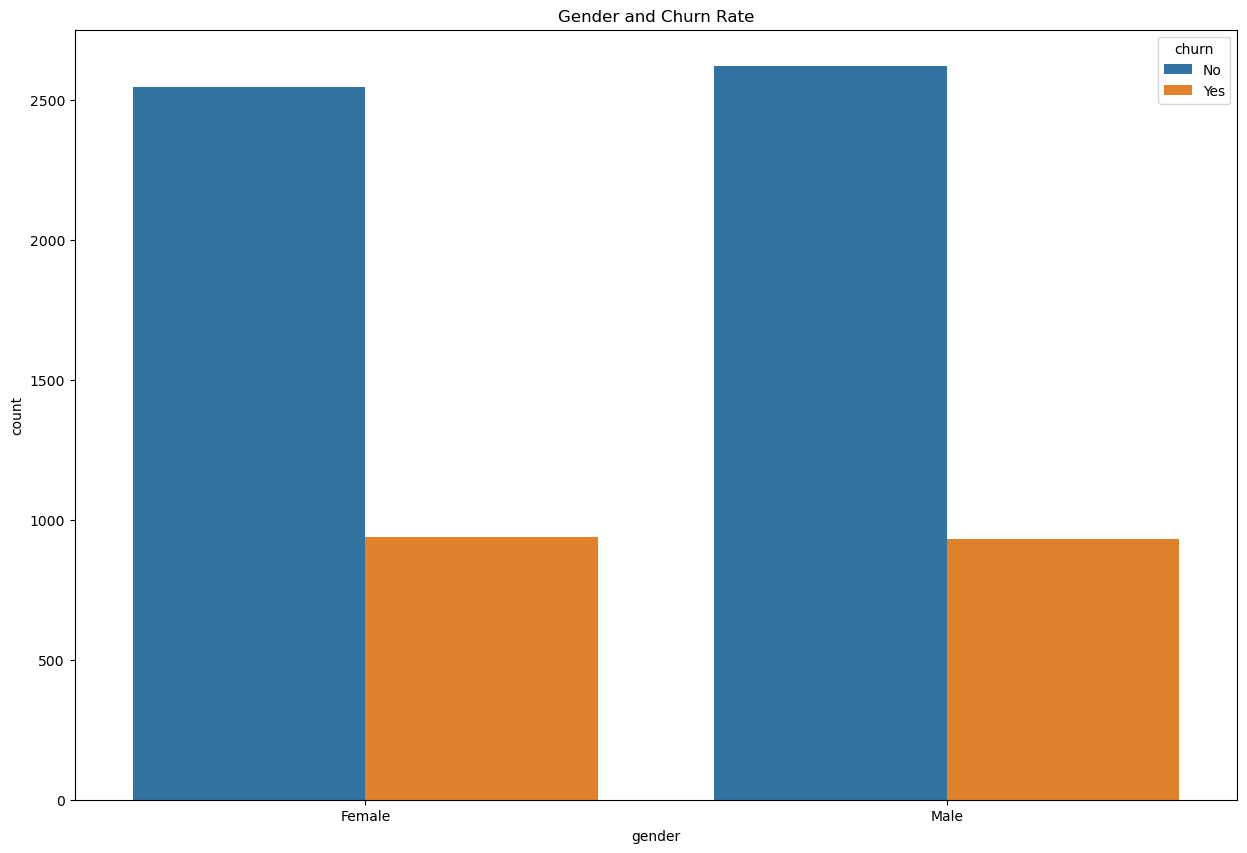

In [31]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'gender', hue = 'churn')
plt.title('Gender and Churn Rate')
plt.show()

In [32]:
# Menghitung value count untuk setiap kombinasi 'senior citizen' dan 'churn'
value_counts = df.groupby(['gender', 'churn']).size().reset_index(name='Count')

# Menampilkan hasil value count
print(value_counts)


   gender churn  Count
0  Female    No   2544
1  Female   Yes    939
2    Male    No   2619
3    Male   Yes    930


Dari dataset di atas diketahui bahwa gender female yang churn adalah 939 customer dan male 930 customer. Dalam kedua kelompok gender, rasio churn terhadap total pelanggan tampak sebanding. Ini menunjukkan bahwa keputusan untuk churn tidak terlalu dipengaruhi oleh gender secara signifikan.

### 4.3.2 EDA Kolom Senior Citizen

Text(0.5, 1.0, 'Senior Citizen Distribution')

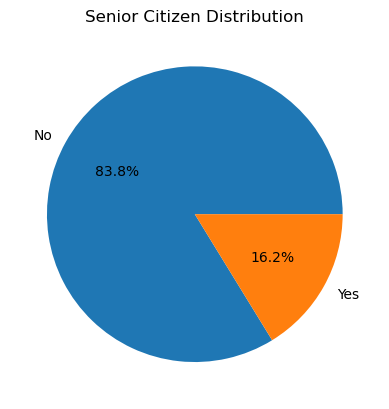

In [33]:
plt.pie(x = df['senior_citizen'].value_counts(), labels = df['senior_citizen'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Senior Citizen Distribution")

In [34]:
target = df["senior_citizen"].value_counts().reset_index()
persen = df["senior_citizen"].value_counts(normalize=True).reset_index()
target["percentage"] = persen["senior_citizen"]
target

,index,senior_citizen,percentage
0,No,5890,0.8376
1,Yes,1142,0.1624


Dari plot di atas diketahui bahwa terdapat 1142 customer yang termasuk senior citizen pada dataset ini

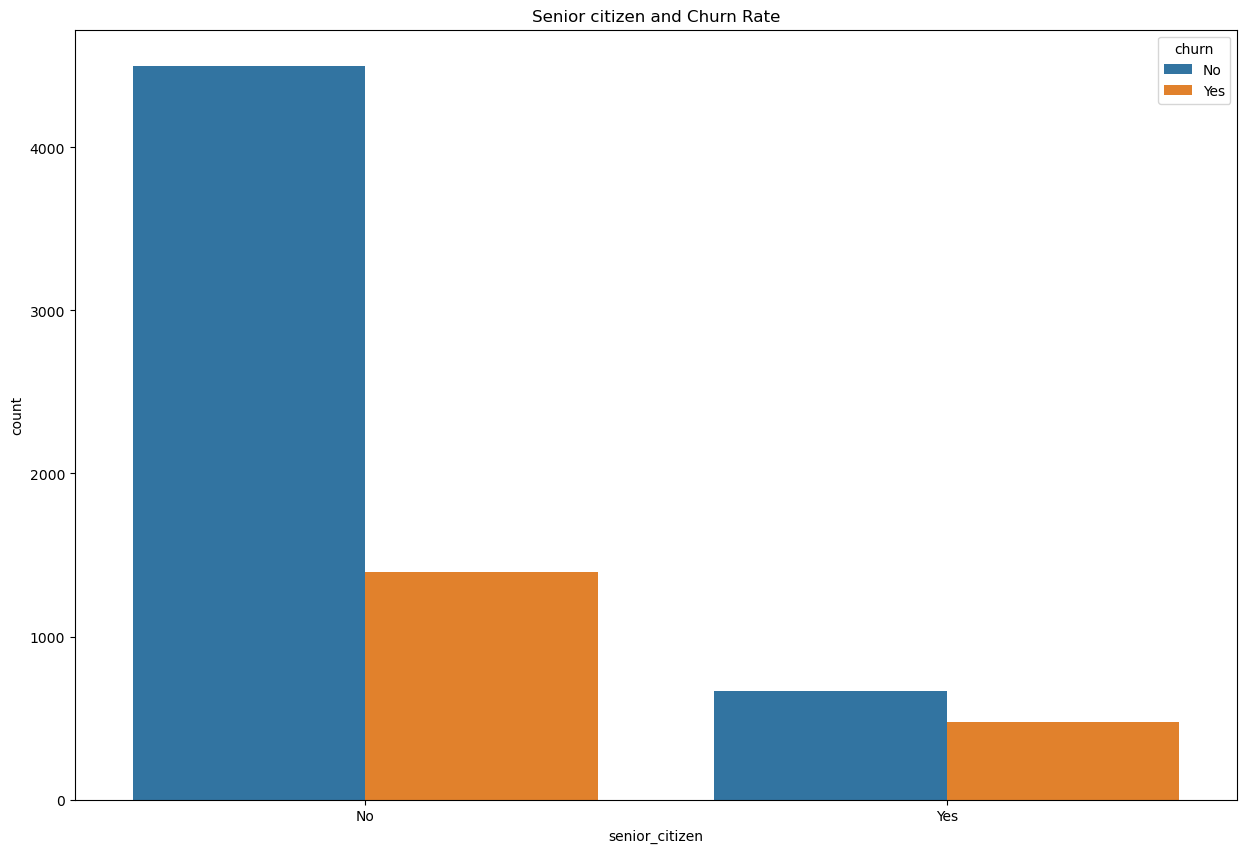

In [35]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'senior_citizen', hue = 'churn')
plt.title('Senior citizen and Churn Rate')
plt.show()

In [36]:
# Menghitung value count untuk setiap kombinasi 'senior citizen' dan 'churn'
value_counts = df.groupby(['senior_citizen', 'churn']).size().reset_index(name='Count')

# Menampilkan hasil value count
print(value_counts)


  senior_citizen churn  Count
0             No    No   4497
1             No   Yes   1393
2            Yes    No    666
3            Yes   Yes    476


Dari perbandingan plot di atas diketahui bahwa senior citizen yang churn sebesar 476 customer, dan yang bukan senior citizen sebesar 1393 customer

### 4.3.3 EDA Kolom Partner

Text(0.5, 1.0, 'Partner Citizen Distribution')

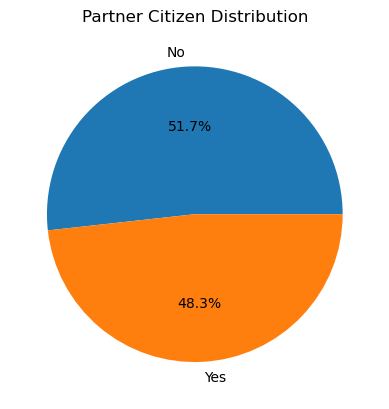

In [37]:
plt.pie(x = df['partner'].value_counts(), labels = df['partner'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Partner Citizen Distribution")

In [38]:
partner_counts = df['partner'].value_counts()
print(partner_counts)

No     3639
Yes    3393
Name: partner, dtype: int64


Dari distribusi kolom partner, terlihat bahwa kategori "No" memiliki frekuensi yang sedikit lebih tinggi dibandingkan dengan kategori "Yes". Namun, perbedaan frekuensi ini tidak terlalu besar.

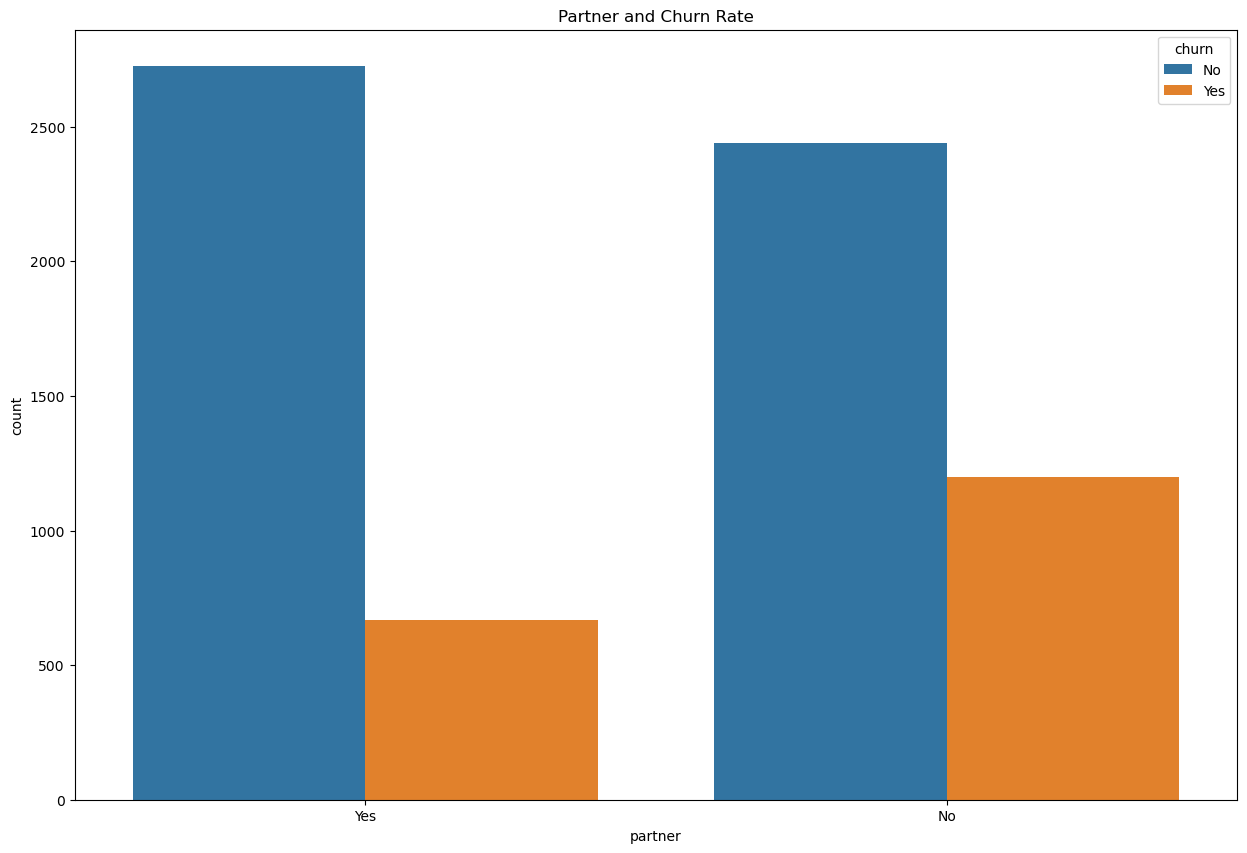

In [39]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'partner', hue = 'churn')
plt.title('Partner and Churn Rate')
plt.show()

In [40]:
value_counts = df.groupby(['partner', 'churn']).size().reset_index(name='Count')
print(value_counts)

  partner churn  Count
0      No    No   2439
1      No   Yes   1200
2     Yes    No   2724
3     Yes   Yes    669


dari data di atas terlihat bahwa tingkat churn rate yang lebih tinggi adalah yang tidak memiliki pasangan atau partner dibandingkan yang tidak memiliki partner

### 4.3.4 EDA Kolom Dependen

Text(0.5, 1.0, 'Dependents Citizen Distribution')

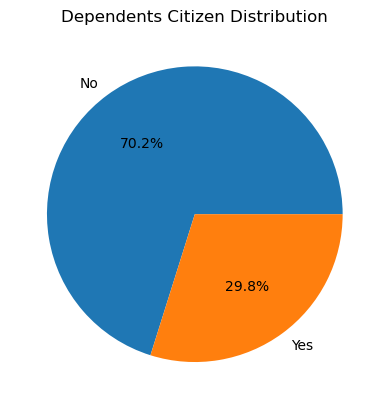

In [41]:
plt.pie(x = df['dependents'].value_counts(), labels = df['dependents'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Dependents Citizen Distribution")

In [42]:
dependents_counts = df['dependents'].value_counts()
print(dependents_counts)

No     4933
Yes    2099
Name: dependents, dtype: int64


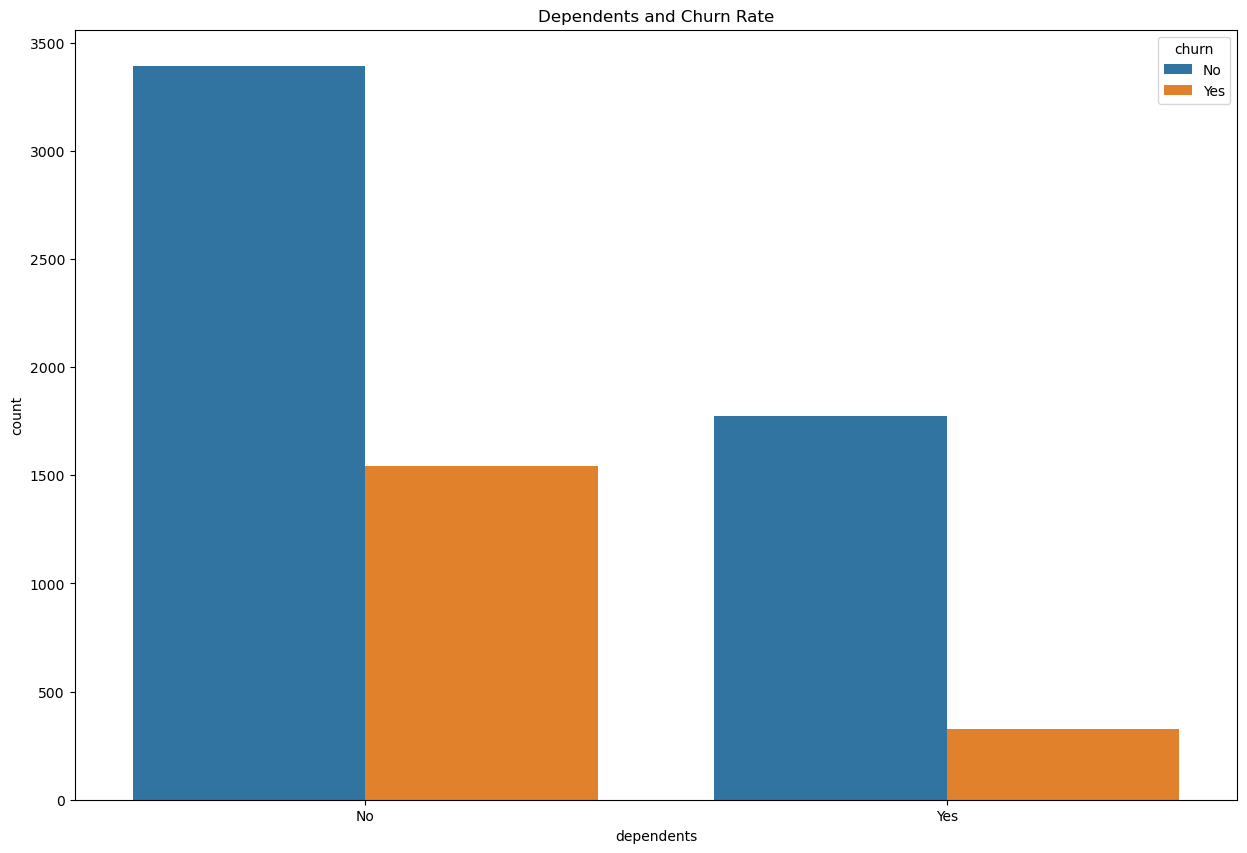

In [43]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'dependents', hue = 'churn')
plt.title('Dependents and Churn Rate')
plt.show()

In [44]:
value_counts = df.groupby(['dependents', 'churn']).size().reset_index(name='Count')
print(value_counts)

  dependents churn  Count
0         No    No   3390
1         No   Yes   1543
2        Yes    No   1773
3        Yes   Yes    326


Dari data di atas dapat dilihat mayoritas dari pelanggan yang memiiki tanggungan tidak churn, tetapi mayoritas pelanggan yang tidak memiliki tanggungan kebanyakan churn dan jumlahnya lebih banyak dari customer yang memiliki keluarga dan churn

### 4.3.5 EDA Kolom Streaming TV

Text(0.5, 1.0, 'Streaming TV Citizen Distribution')

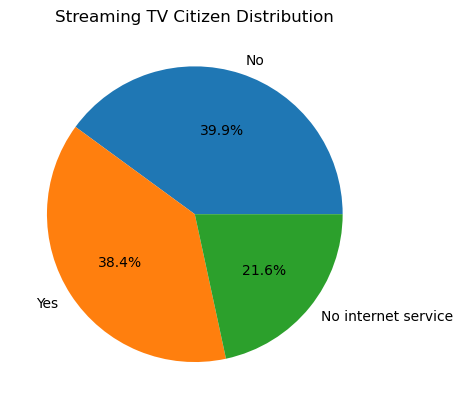

In [45]:
plt.pie(x = df['streaming_tv'].value_counts(), labels = df['streaming_tv'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Streaming TV Citizen Distribution")

In [46]:
df["streaming_tv"].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: streaming_tv, dtype: int64

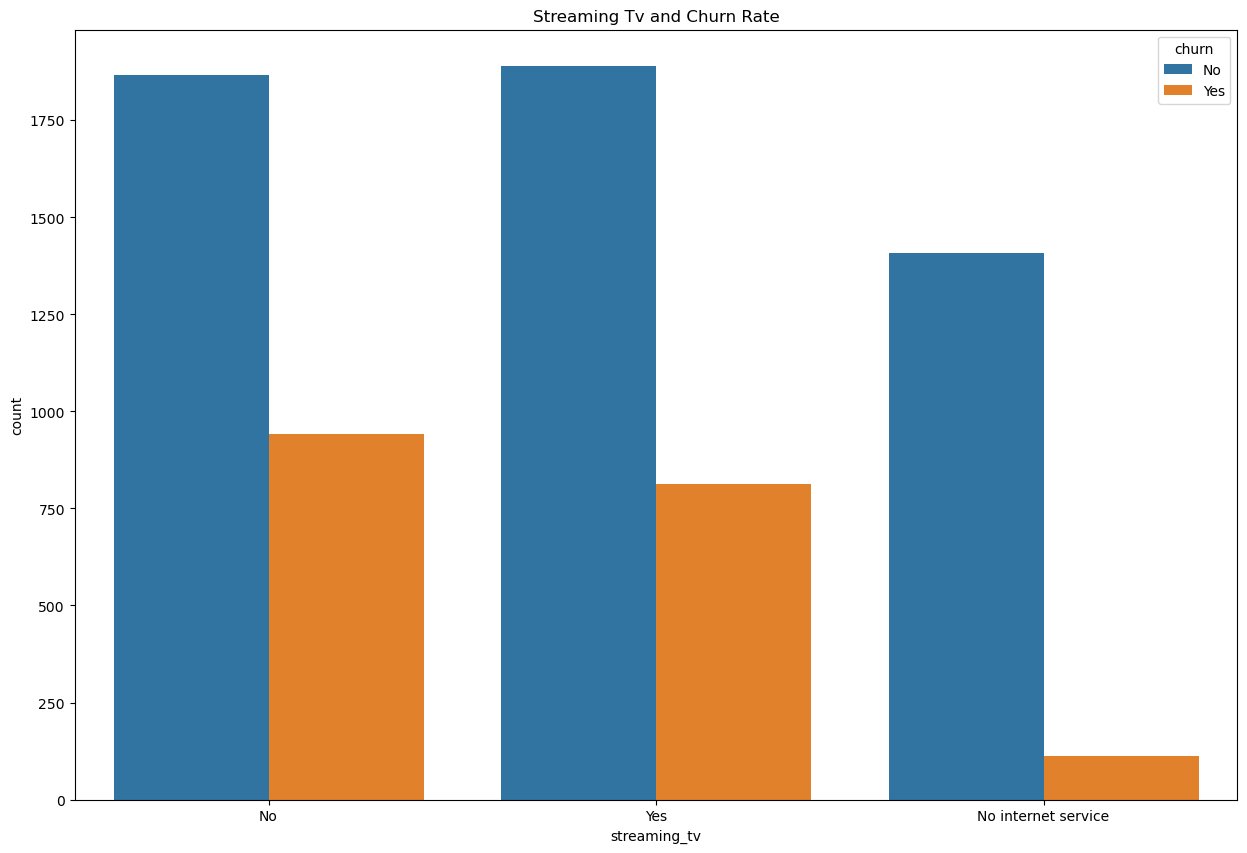

In [47]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'streaming_tv', hue = 'churn')
plt.title('Streaming Tv and Churn Rate')
plt.show()

In [48]:
value_counts = df.groupby(['streaming_tv', 'churn']).size().reset_index(name='Count')
print(value_counts)

          streaming_tv churn  Count
0                   No    No   1867
1                   No   Yes    942
2  No internet service    No   1407
3  No internet service   Yes    113
4                  Yes    No   1889
5                  Yes   Yes    814


Mayoritas pelanggan yang tidak menggunakan layanan streaming TV tidak churn namun Jumlah pelanggan yang tidak melakukan streaming TV dan melakukan churn juga cukup tinggi,  jumlah pelanggan yang melakukan streaming TV dan melakukan churn juga cukup tinggi hampir sama dengan yang tidak menggunakan layanan streaming

### 4.3.6 EDA Kolom Streaming Movies

Text(0.5, 1.0, 'Streaming Movies Citizen Distribution')

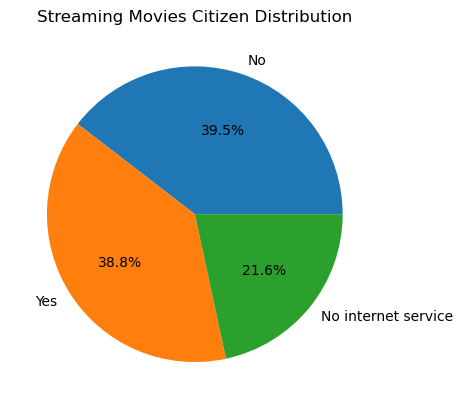

In [49]:
plt.pie(x = df['streaming_movies'].value_counts(), labels = df['streaming_movies'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Streaming Movies Citizen Distribution")

In [50]:
df["streaming_movies"].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: streaming_movies, dtype: int64

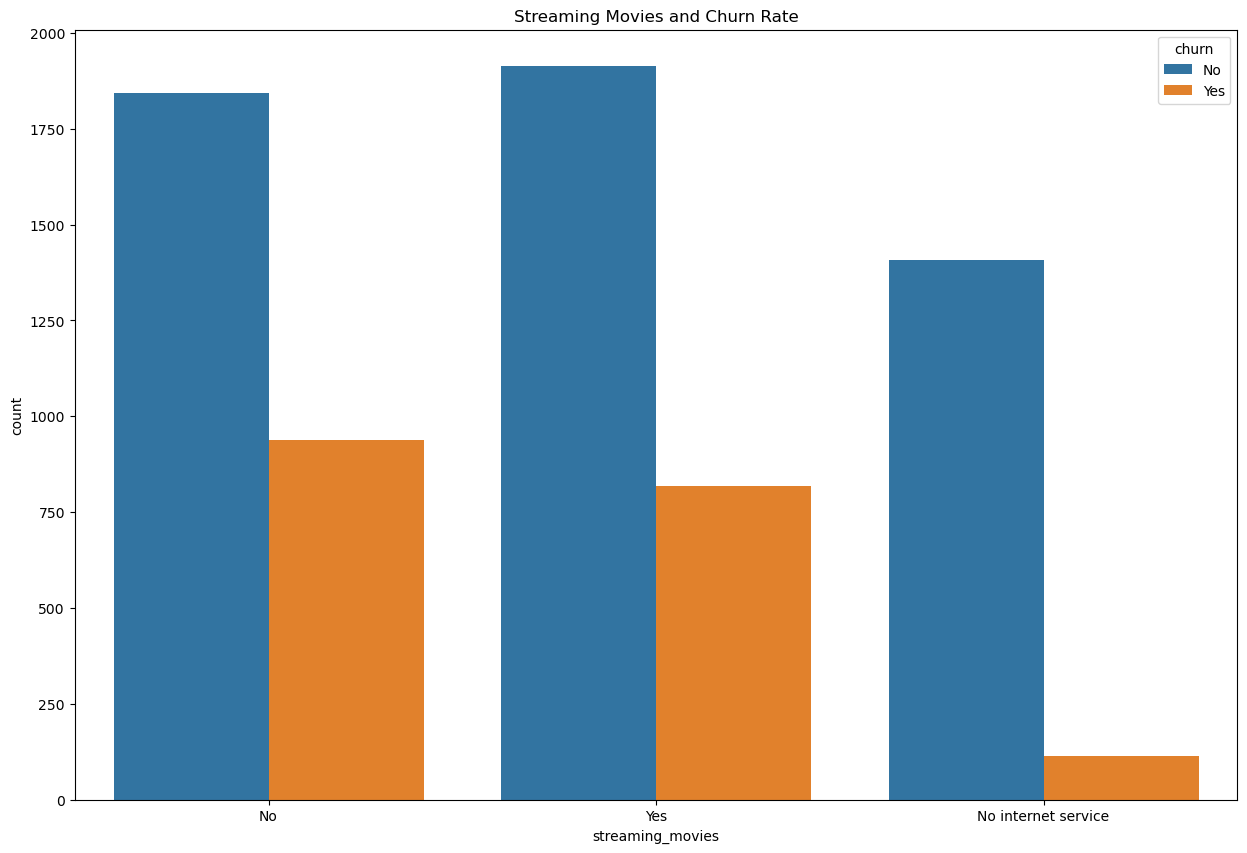

In [51]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'streaming_movies', hue = 'churn')
plt.title('Streaming Movies and Churn Rate')
plt.show()

Pelanggan yang menggunakan layanan streaming film memiliki jumlah pengamatan yang cukup tinggi, tetapi sebagian besar dari mereka tidak melakukan churn. Meskipun begitu, jumlah pelanggan yang melakukan streaming film dan melakukan churn juga cukup signifikan. Kategori No internet service menunjukkan bahwa ada pelanggan yang tidak menggunakan layanan internet. Walaupun mayoritas dari mereka tidak melakukan churn, perlu dipertimbangkan apakah layanan internet ini mungkin menjadi faktor yang memengaruhi keputusan pelanggan untuk tidak melakukan churn.

In [52]:
value_counts = df.groupby(['streaming_movies', 'churn']).size().reset_index(name='Count')
print(value_counts)

      streaming_movies churn  Count
0                   No    No   1843
1                   No   Yes    938
2  No internet service    No   1407
3  No internet service   Yes    113
4                  Yes    No   1913
5                  Yes   Yes    818


In [53]:
churned_streamingtvmovies_counts = churned[['streaming_tv', 'streaming_movies']].value_counts()
churned_streamingtvmovies_counts

streaming_tv         streaming_movies   
No                   No                     695
Yes                  Yes                    571
No                   Yes                    247
Yes                  No                     243
No internet service  No internet service    113
dtype: int64

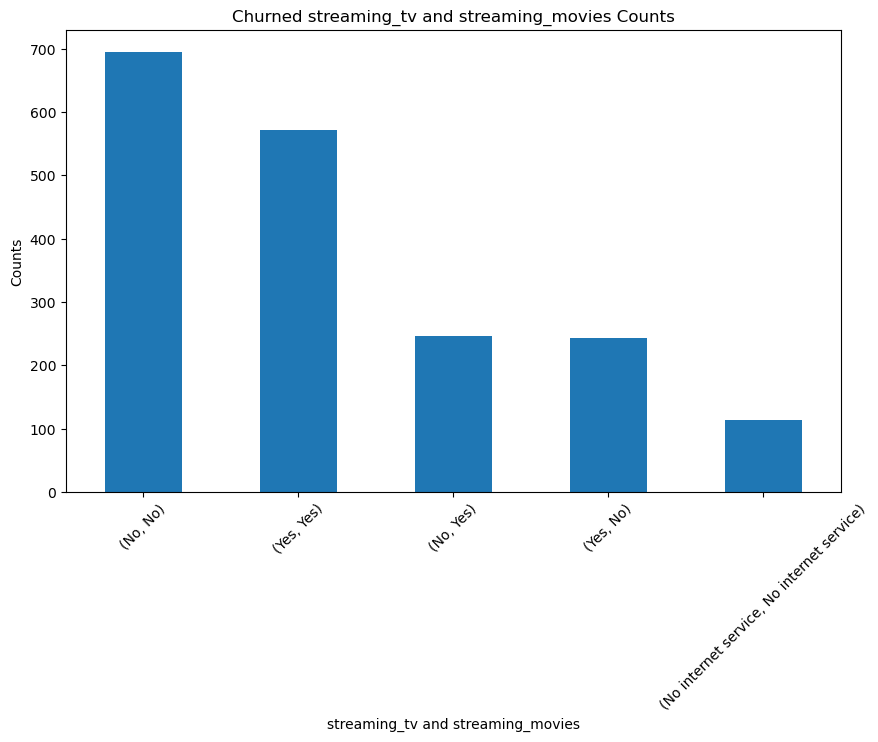

In [54]:
churned_streamingtvmovies_counts = churned[['streaming_tv', 'streaming_movies']].value_counts()

# bar chart
plt.figure(figsize=(10, 6))
churned_streamingtvmovies_counts.plot(kind='bar')
plt.title('Churned streaming_tv and streaming_movies Counts')
plt.xlabel('streaming_tv and streaming_movies')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

Berdasarkan data ini, dapat disarankan untuk mempertimbangkan melakukan segmentasi pelanggan. Misalnya, dengan membuat kelompok pelanggan yang hanya menggunakan salah satu dari layanan streaming, kelompok yang menggunakan keduanya, dan kelompok yang tidak menggunakan layanan apa pun. Kemudian setelah melakukan segmentasi pelanggan, langkah selanjutnya dapat menyusun paket layanan yang sesuai dengan kebutuhan masing-masing kelompok sehingga dapat menawarkan paket Layanan yang Sesuai. Ini dapat membantu meningkatkan kepuasan pelanggan dan meminimalkan tingkat churn.

### 4.3.7 EDA Kolom Phone Service

Text(0.5, 1.0, 'Phone Service Movies Citizen Distribution')

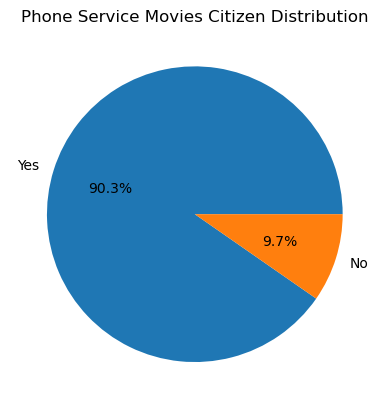

In [55]:
plt.pie(x = df['phone_service'].value_counts(), labels = df['phone_service'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Phone Service Movies Citizen Distribution")

In [56]:
df["phone_service"].value_counts()

Yes    6352
No      680
Name: phone_service, dtype: int64

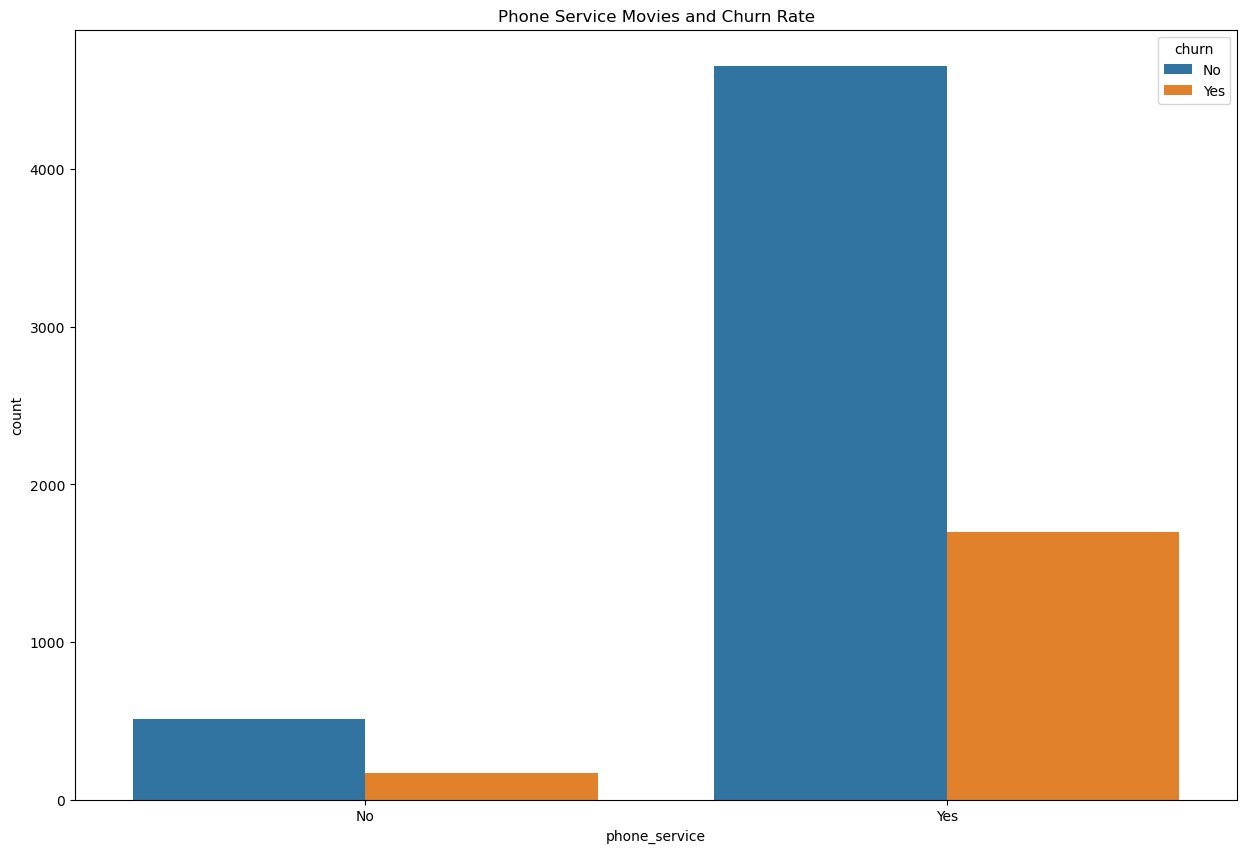

In [57]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'phone_service', hue = 'churn')
plt.title('Phone Service Movies and Churn Rate')
plt.show()

In [58]:
value_counts = df.groupby(['phone_service', 'churn']).size().reset_index(name='Count')
print(value_counts)

  phone_service churn  Count
0            No    No    510
1            No   Yes    170
2           Yes    No   4653
3           Yes   Yes   1699


Jumlah pelanggan yang bukan senior citizen (No) yang tidak churn (4497) lebih tinggi dibandingkan yang churn (1393). secara keseluruhan, pelanggan non-senior citizen lebih dominan dan memiliki tingkat churn yang lebih rendah dibandingkan pelanggan senior citizen. Meskipun jumlah pelanggan non-senior citizen lebih banyak, rasio churn terhadap total pelanggan senior citizen (42.9%) lebih tinggi dibandingkan non-senior citizen (23.6%). sehingga untuk menangani kelompok senior citizen dapat disarankan untuk edukasikan pelanggan tentang manfaat jangka panjang dari tetap setia. Fokus pada keunggulan layanan, diskon, atau keuntungan lain yang dapat menjadi faktor penentu bagi kelompok ini. Tingkatkan komunikasi dengan pelanggan senior citizen melalui saluran yang sesuai bagi mereka. Pastikan informasi tentang produk dan layanan dapat diakses dengan mudah dan dipahami.

### 4.3.8 EDA Kolom Multiple Line

Text(0.5, 1.0, 'Multiple Lines Citizen Distribution')

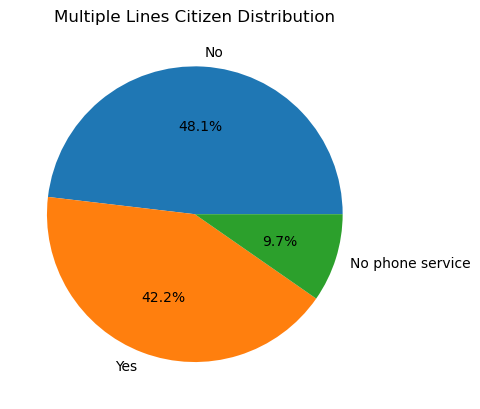

In [59]:
plt.pie(x = df['multiple_lines'].value_counts(), labels = df['multiple_lines'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Multiple Lines Citizen Distribution")

In [60]:
df["multiple_lines"].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64

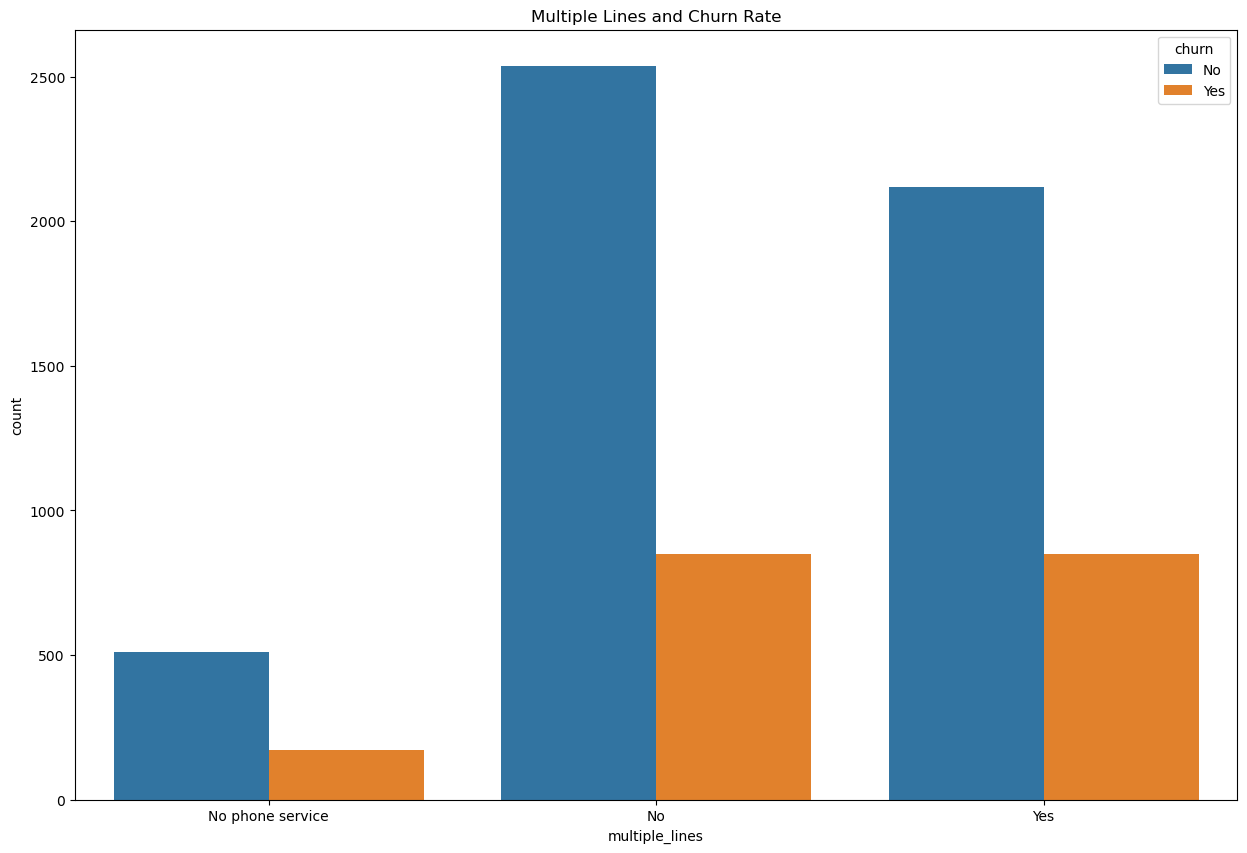

In [61]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'multiple_lines', hue = 'churn')
plt.title('Multiple Lines and Churn Rate')
plt.show()

In [62]:
value_counts = df.groupby(['multiple_lines', 'churn']).size().reset_index(name='Count')
print(value_counts)

     multiple_lines churn  Count
0                No    No   2536
1                No   Yes    849
2  No phone service    No    510
3  No phone service   Yes    170
4               Yes    No   2117
5               Yes   Yes    850


Pelanggan dengan layanan multiple lines (Yes) yang tidak churn (2117) lebih banyak dibandingkan yang churn (850). Pelanggan tanpa layanan multiple lines (No) juga cenderung lebih banyak yang tidak churn (2536) dibandingkan yang churn (849). Layanan "No phone service" memiliki tingkat churn yang lebih rendah dibandingkan dengan layanan multiple lines. Rasio churn terhadap total pelanggan tampak lebih rendah pada pelanggan dengan layanan multiple lines (28.6%) dibandingkan dengan pelanggan tanpa layanan multiple lines (25%). dari data diatas dapat disarankan untuk mempertimbangkan untuk menawarkan bundling layanan agar pelanggan dapat mendapatkan lebih banyak nilai tambah dengan memilih beberapa layanan sekaligus. bisa juga memerikan diskon atau insentif khusus untuk pelanggan yang memilih bundling.

### 4.3.9 EDA Kolom Online Security

Text(0.5, 1.0, 'online_security Distribution')

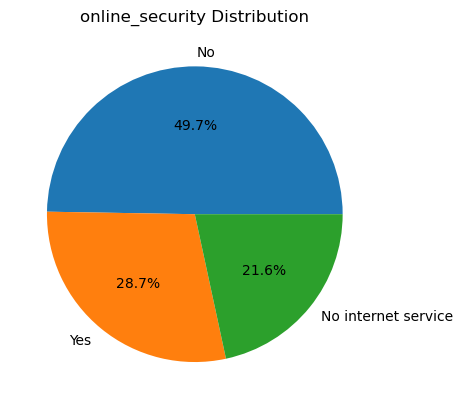

In [63]:
plt.pie(x = df['online_security'].value_counts(), labels = df['online_security'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("online_security Distribution")

In [64]:
df["online_security"].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: online_security, dtype: int64

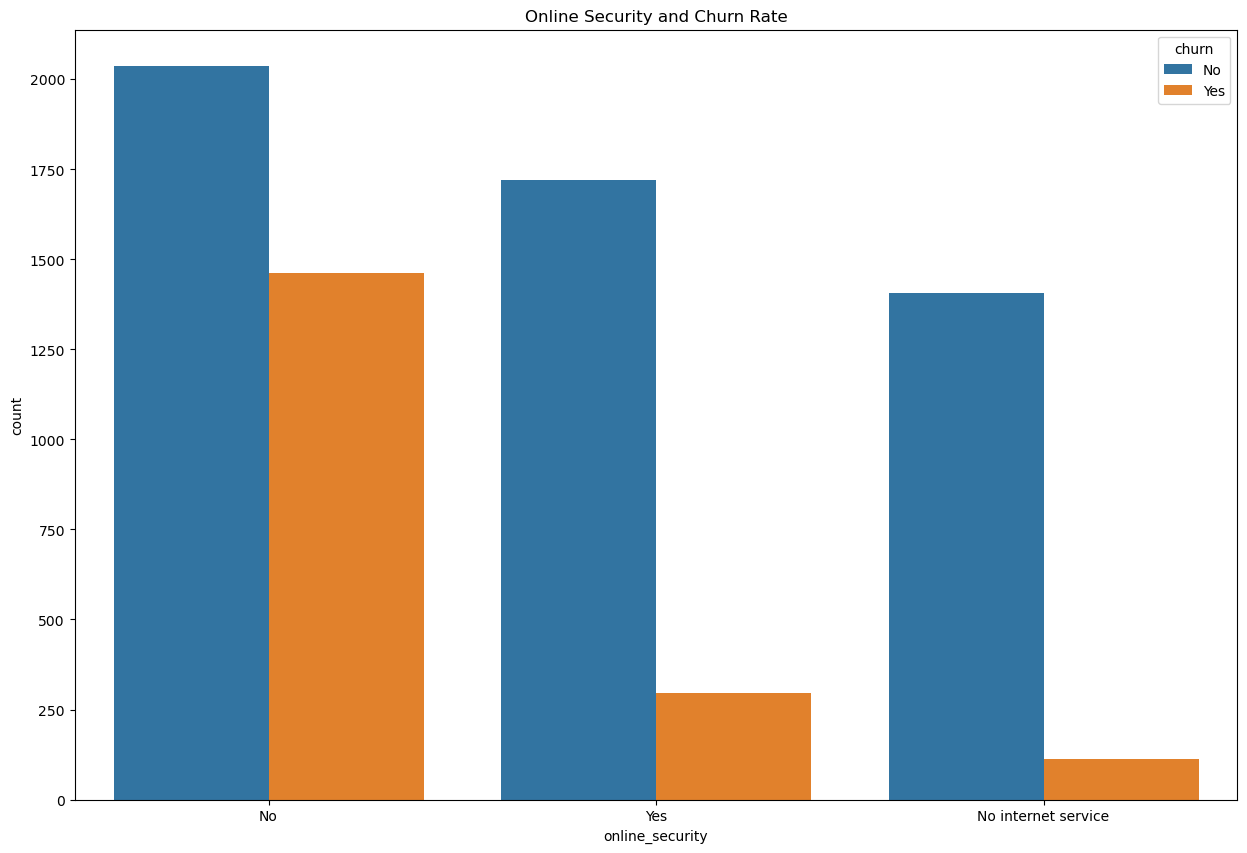

In [65]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'online_security', hue = 'churn')
plt.title('Online Security and Churn Rate')
plt.show()

In [66]:
value_counts = df.groupby(['online_security', 'churn']).size().reset_index(name='Count')
print(value_counts)

       online_security churn  Count
0                   No    No   2036
1                   No   Yes   1461
2  No internet service    No   1407
3  No internet service   Yes    113
4                  Yes    No   1720
5                  Yes   Yes    295


Pelanggan dengan layanan Online Security (Yes) yang tidak churn (1720) lebih banyak dibandingkan yang churn (295). Pelanggan tanpa layanan Online Security (No) juga memiliki jumlah yang signifikan yang tidak churn (2036), tetapi jumlah yang churn (1461) lebih tinggi. Layanan No Internet Service memiliki tingkat churn yang sangat rendah dibandingkan dengan layanan Online Security. Rasio Churn Berdasarkan Tipe Layanan Rasio churn terhadap total pelanggan tampak lebih tinggi pada pelanggan tanpa layanan Online Security (41.8%) dibandingkan dengan pelanggan tanpa layanan Internet Service (7.4%).

### 4.3.10 EDA Kolom Online Backup

Text(0.5, 1.0, 'Online Backup Distribution')

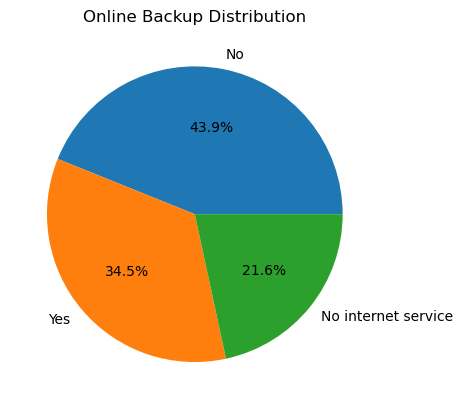

In [67]:
plt.pie(x = df['online_backup'].value_counts(), labels = df['online_backup'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Online Backup Distribution")

In [68]:
df["online_backup"].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: online_backup, dtype: int64

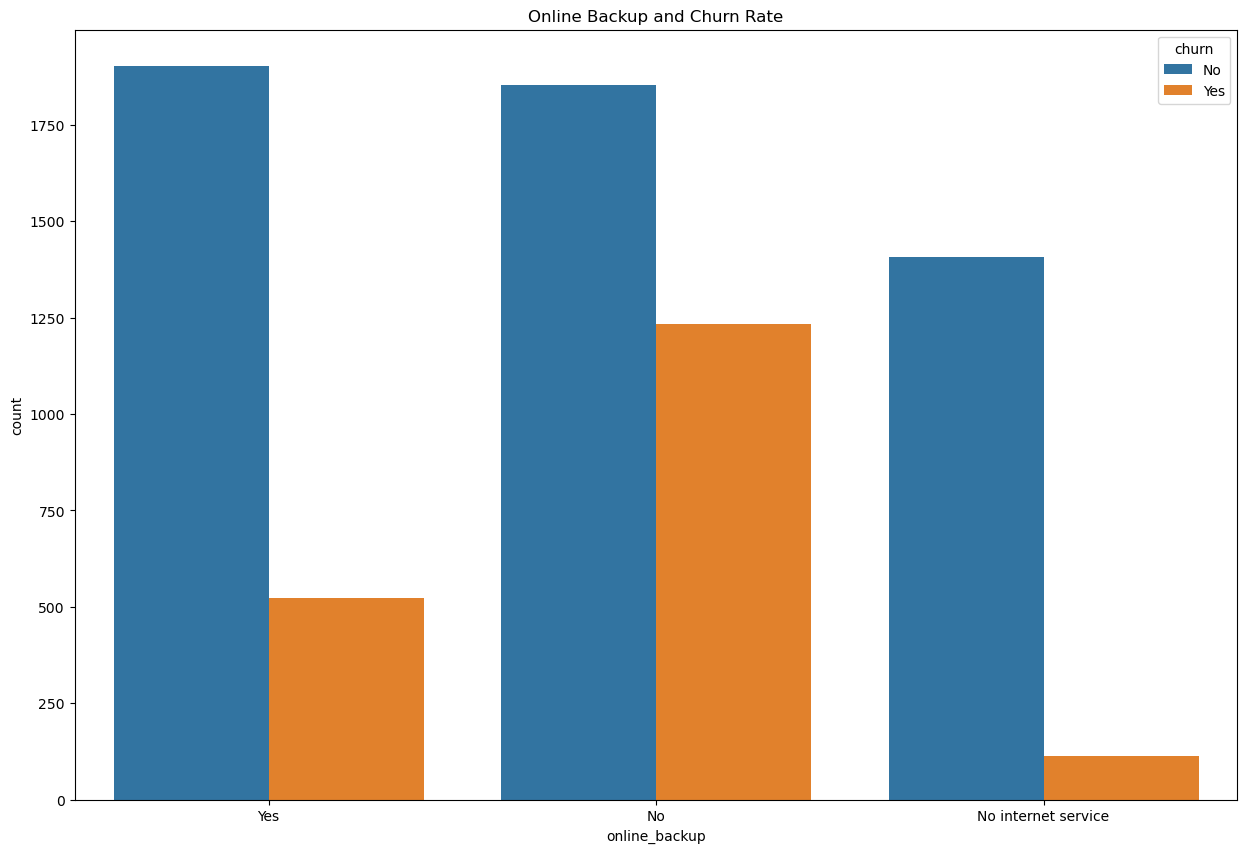

In [69]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'online_backup', hue = 'churn')
plt.title('Online Backup and Churn Rate')
plt.show()

In [70]:
value_counts = df.groupby(['online_backup', 'churn']).size().reset_index(name='Count')
print(value_counts)

         online_backup churn  Count
0                   No    No   1854
1                   No   Yes   1233
2  No internet service    No   1407
3  No internet service   Yes    113
4                  Yes    No   1902
5                  Yes   Yes    523


Pelanggan dengan layanan Online Backup (Yes) yang tidak churn (1902) lebih banyak dibandingkan yang churn (523). Pelanggan tanpa layanan Online Backup (No) memiliki jumlah yang signifikan yang tidak churn (1854), tetapi jumlah yang churn (1233) lebih tinggi. Pelanggan dengan layanan "No Internet Service" yang tidak churn (1407) lebih banyak dibandingkan yang churn (113). Layanan No Internet Service memiliki tingkat churn yang sangat rendah dibandingkan dengan layanan Online Backup. Rasio churn terhadap total pelanggan tampak lebih tinggi pada pelanggan tanpa layanan Online Backup (39.9%) dibandingkan dengan pelanggan tanpa layanan Internet Service (7.4%).

### 4.3.11 EDA Kolom Device Protection

Text(0.5, 1.0, 'Device Protection Distribution')

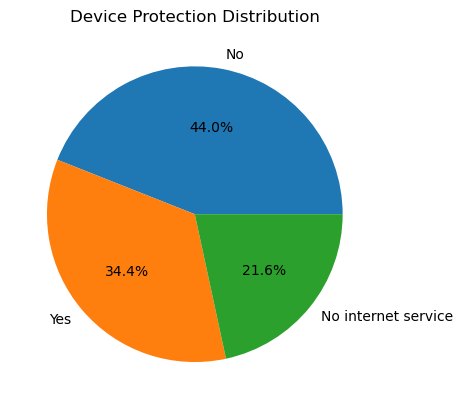

In [71]:
plt.pie(x = df['device_protection'].value_counts(), labels = df['device_protection'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Device Protection Distribution")

In [72]:
df["device_protection"].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: device_protection, dtype: int64

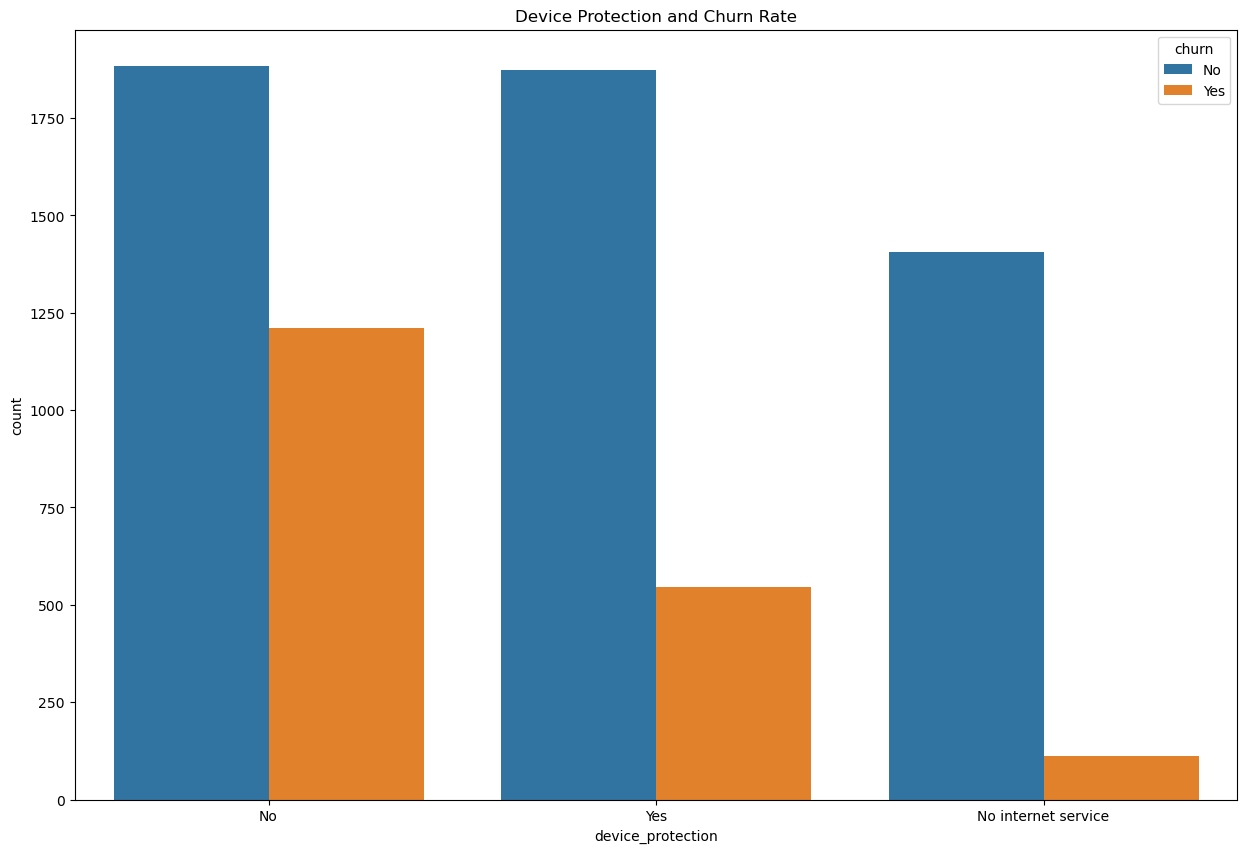

In [73]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'device_protection', hue = 'churn')
plt.title('Device Protection and Churn Rate')
plt.show()

In [74]:
value_counts = df.groupby(['device_protection', 'churn']).size().reset_index(name='Count')
print(value_counts)

     device_protection churn  Count
0                   No    No   1883
1                   No   Yes   1211
2  No internet service    No   1407
3  No internet service   Yes    113
4                  Yes    No   1873
5                  Yes   Yes    545


Pelanggan dengan layanan Device Protection (Yes) yang tidak churn (1873) lebih banyak dibandingkan yang churn (545). Pelanggan tanpa layanan Device Protection (No) memiliki jumlah yang signifikan yang tidak churn (1883), tetapi jumlah yang churn (1211) lebih tinggi. Pelanggan dengan layanan No Internet Service yang tidak churn (1407) lebih banyak dibandingkan yang churn (113). Layanan No Internet Service memiliki tingkat churn yang sangat rendah dibandingkan dengan layanan Device Protection. Rasio churn terhadap total pelanggan tampak lebih tinggi pada pelanggan tanpa layanan Device Protection (39.2%) dibandingkan dengan pelanggan tanpa layanan Internet Service (7.4%).

### 4.3.12 EDA Kolom Tech Support

Text(0.5, 1.0, 'Tech Support Distribution')

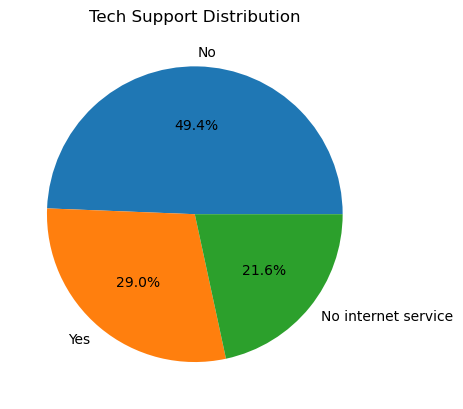

In [75]:
plt.pie(x = df['tech_support'].value_counts(), labels = df['tech_support'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Tech Support Distribution")

In [76]:
df["tech_support"].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: tech_support, dtype: int64

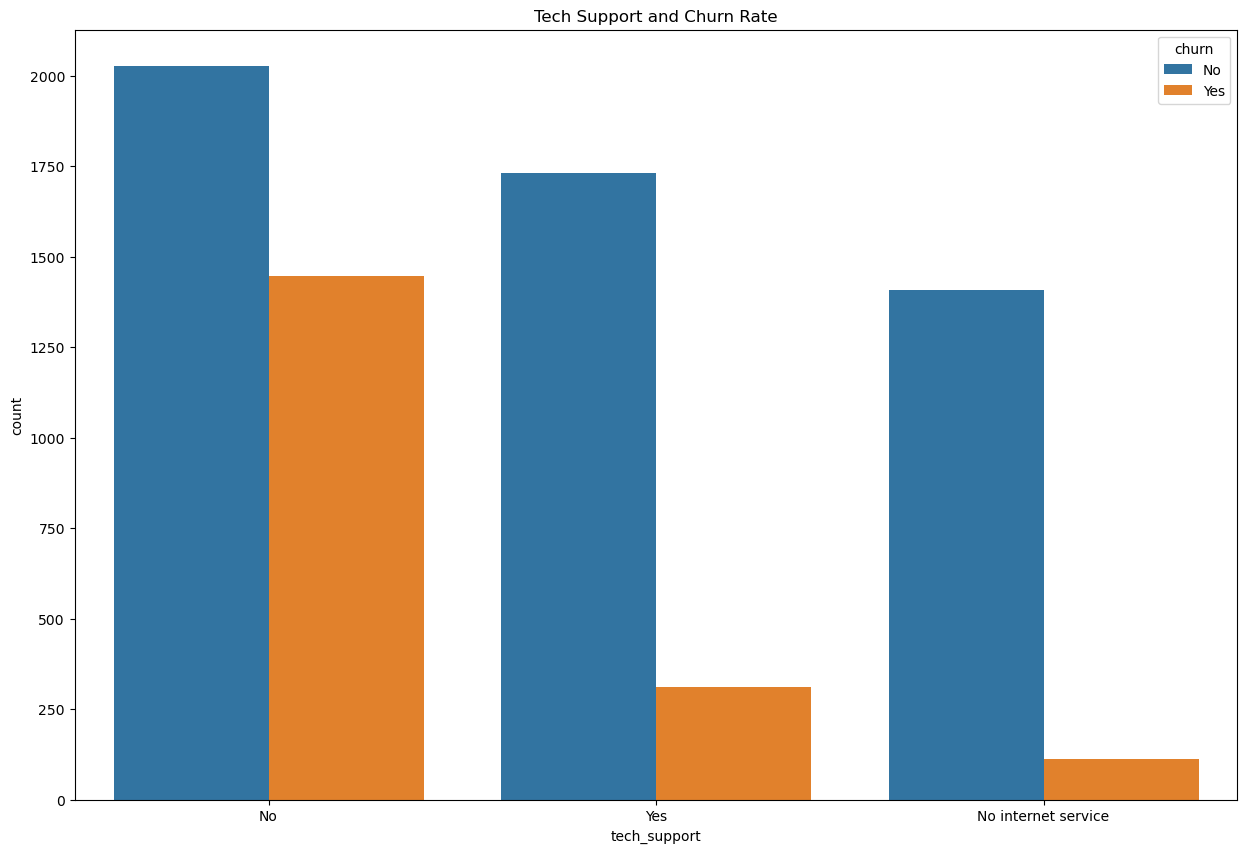

In [77]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'tech_support', hue = 'churn')
plt.title('Tech Support and Churn Rate')
plt.show()

In [78]:
value_counts = df.groupby(['tech_support', 'churn']).size().reset_index(name='Count')
print(value_counts)

          tech_support churn  Count
0                   No    No   2026
1                   No   Yes   1446
2  No internet service    No   1407
3  No internet service   Yes    113
4                  Yes    No   1730
5                  Yes   Yes    310


Pelanggan dengan layanan Tech Support (Yes) yang tidak churn (1730) lebih banyak dibandingkan yang churn (310).
Pelanggan tanpa layanan Tech Support (No) memiliki jumlah yang signifikan yang tidak churn (2026), tetapi jumlah yang churn (1446) lebih tinggi. Pelanggan dengan layanan "No Internet Service" yang tidak churn (1407) lebih banyak dibandingkan yang churn (113). Layanan No Internet Service memiliki tingkat churn yang sangat rendah dibandingkan dengan layanan Tech Support Rasio churn terhadap total pelanggan tampak lebih tinggi pada pelanggan tanpa layanan Tech Support (41.7%) dibandingkan dengan pelanggan tanpa layanan Internet Service (7.4%).

### 4.3.13 EDA Kolom Paperless Billing

Text(0.5, 1.0, 'Paperless Billing Distribution')

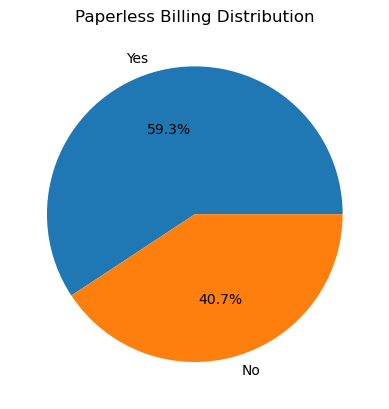

In [79]:
plt.pie(x = df['paperless_billing'].value_counts(), labels = df['paperless_billing'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Paperless Billing Distribution")

In [80]:
df['paperless_billing'].value_counts()

Yes    4168
No     2864
Name: paperless_billing, dtype: int64

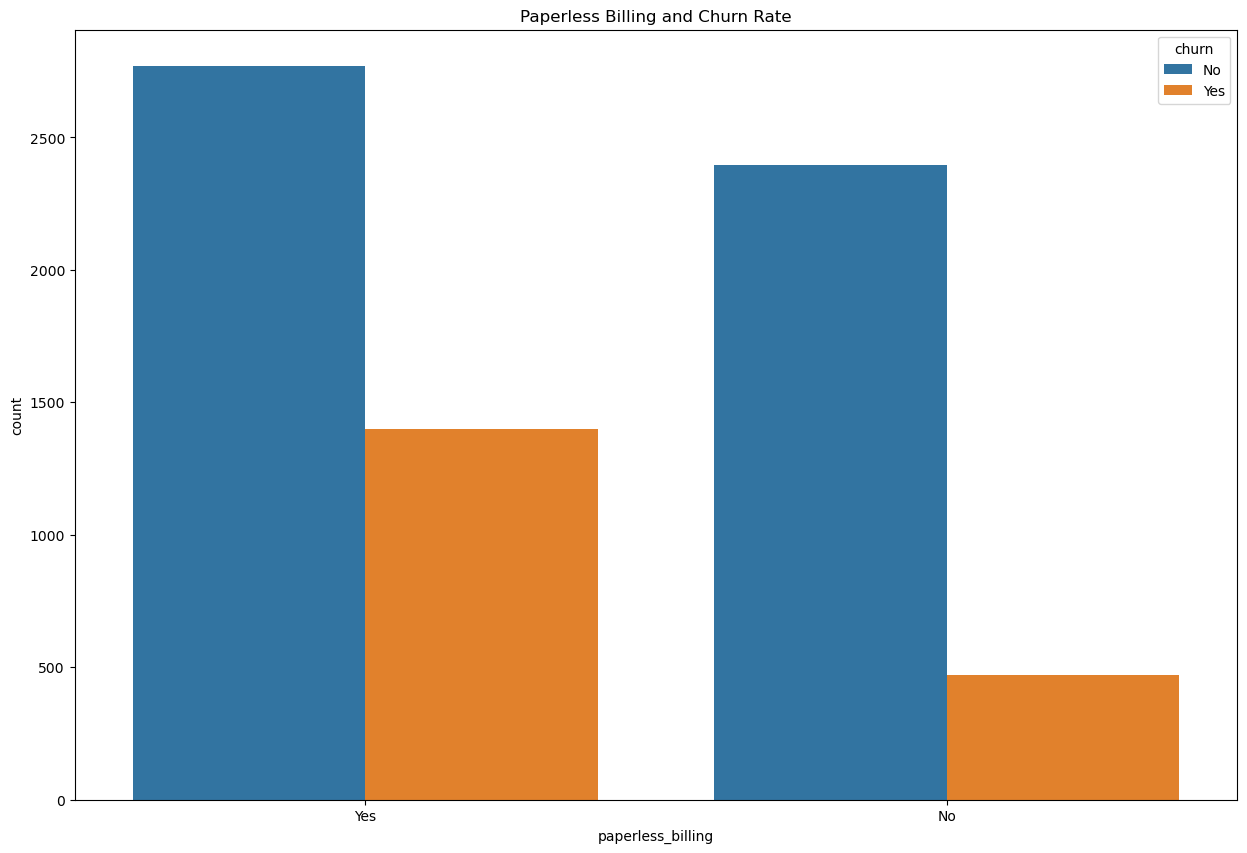

In [81]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'paperless_billing', hue = 'churn')
plt.title('Paperless Billing and Churn Rate')
plt.show()

In [82]:
value_counts = df.groupby(['paperless_billing', 'churn']).size().reset_index(name='Count')
print(value_counts)

  paperless_billing churn  Count
0                No    No   2395
1                No   Yes    469
2               Yes    No   2768
3               Yes   Yes   1400


Pelanggan dengan layanan Paperless Billing (Yes) yang tidak churn (2768) lebih banyak dibandingkan yang churn (1400). Pelanggan yang tidak menggunakan layanan Paperless Billing (No) memiliki jumlah yang tidak churn (2395), tetapi jumlah yang churn (469) lebih rendah. Rasio churn terhadap total pelanggan tampak lebih tinggi pada pelanggan yang menggunakan layanan Paperless Billing (33.6%) dibandingkan dengan pelanggan yang tidak menggunakan layanan tersebut (16.4%). dari data ini dapat disarankan untuk melakukan evaluasi dan memperbarui layanan Paperless Billing untuk meningkatkan fungsionalitas dan daya tariknya. bisa juga dengan menambahkan fitur atau kemudahan baru yang dapat membuat layanan lebih menarik bagi pelanggan dan juga memastikan komunikasi yang efektif terkait dengan keamanan dan privasi informasi pelanggan dalam konteks Paperless Billing.

### 4.3.14 EDA Kolom Internet Service

Text(0.5, 1.0, 'Internet Service Distribution')

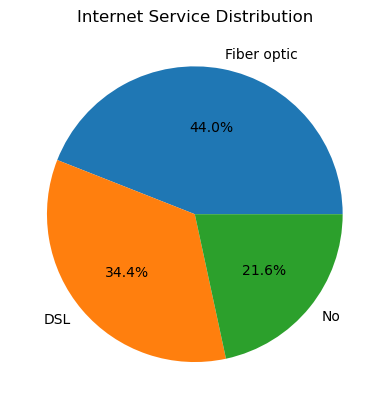

In [83]:
plt.pie(x = df['internet_service'].value_counts(), labels = df['internet_service'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Internet Service Distribution")

In [84]:
df["internet_service"].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: internet_service, dtype: int64

Dari data diatas bisa dilihat bahwa mayoritas pelanggan menggunakan layanan DSL dan Fiber Optic dan yang paling banyak adalah fiber optik

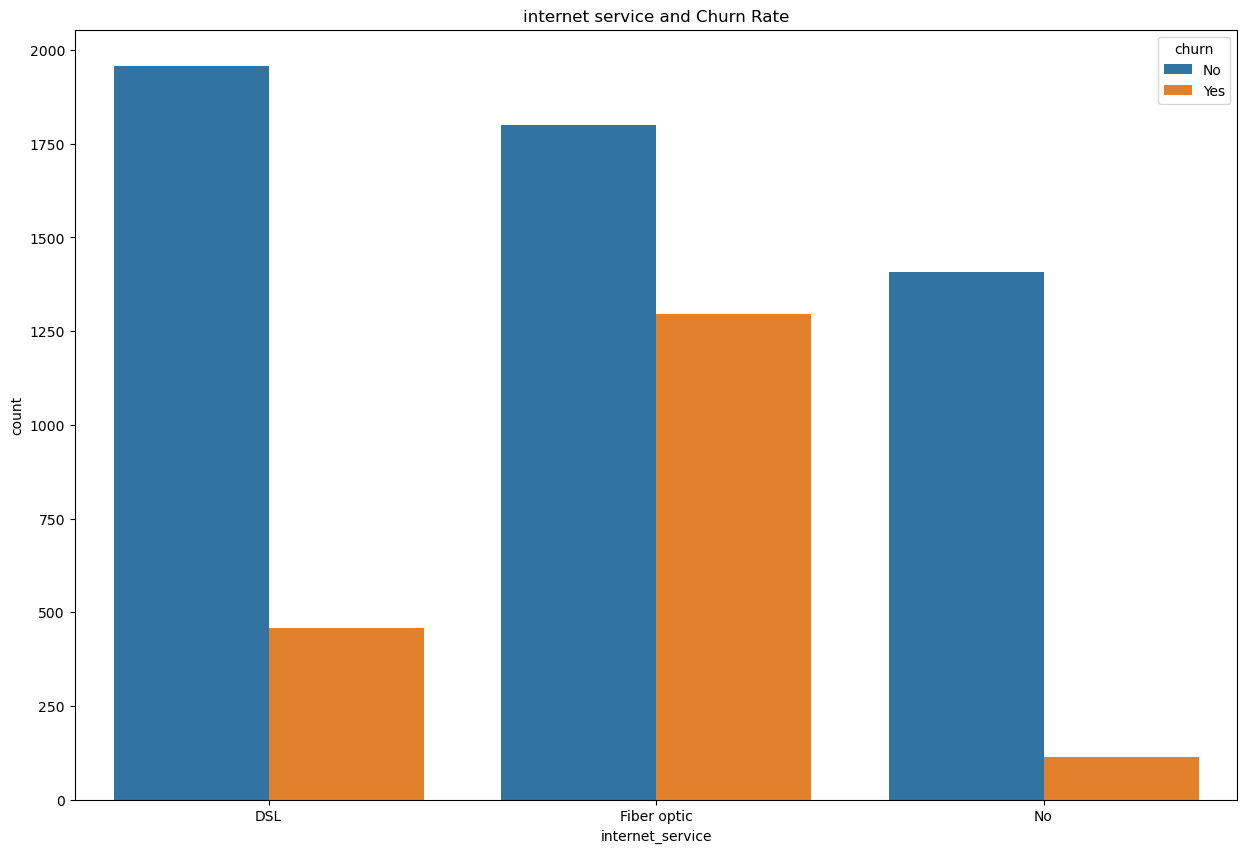

In [85]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'internet_service', hue = 'churn')
plt.title('internet service and Churn Rate')
plt.show()

In [86]:
value_counts = df.groupby(['internet_service', 'churn']).size().reset_index(name='Count')
print(value_counts)

  internet_service churn  Count
0              DSL    No   1957
1              DSL   Yes    459
2      Fiber optic    No   1799
3      Fiber optic   Yes   1297
4               No    No   1407
5               No   Yes    113


Ppelanggan dengan layanan Fiber Optic yang churn (1297) juga lebih banyak dibandingkan dengan pelanggan DSL yang churn (459). Rasio churn terhadap total pelanggan tampak lebih tinggi pada pelanggan dengan layanan Fiber Optic (41.9%) dibandingkan dengan pelanggan DSL (19.0%). Solusi yang perlu dilakukan adalah melakukan evaluasi dan perbarui layanan Fiber Optic untuk meningkatkan kualitas dan kepuasan pelanggan seperti Fokus pada perbaikan kecepatan, kestabilan, dan kemudahan penggunaan. Selain itu perlu ada  penyesuaian strategi pemasaran untuk menekankan keunggulan dan manfaat layanan Fiber Optic yang dapat memenuhi kebutuhan pelanggan dengan mengidentifikasi segmen pasar yang lebih mungkin tertarik pada layanan ini.

### 4.3.15 EDA Kolom Contract

Text(0.5, 1.0, 'Contract Distribution')

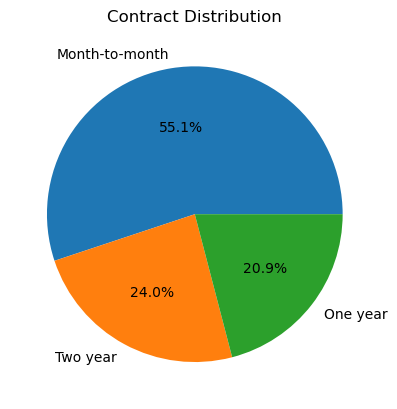

In [87]:
plt.pie(x = df['contract'].value_counts(), labels = df['contract'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Contract Distribution")

In [88]:
df["contract"].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: contract, dtype: int64

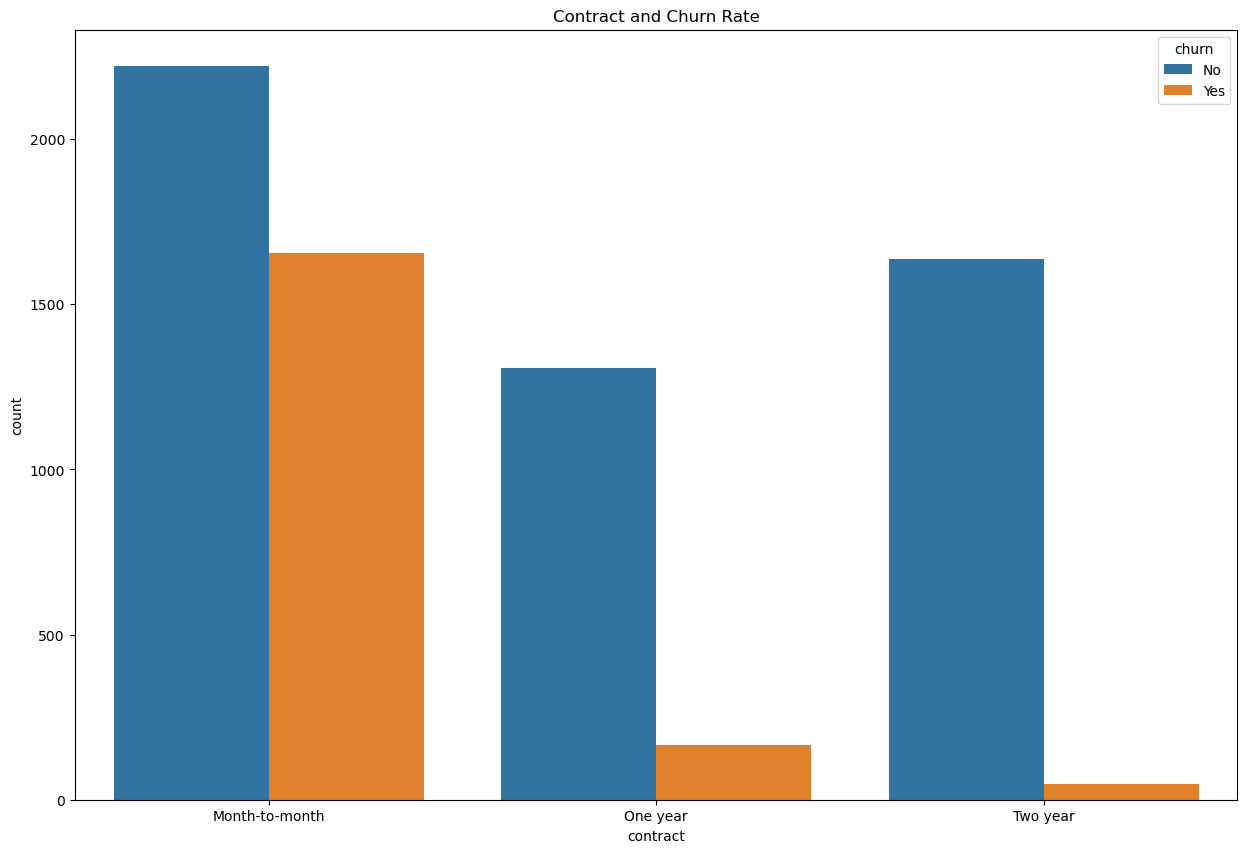

In [89]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'contract', hue = 'churn')
plt.title('Contract and Churn Rate')
plt.show()

In [90]:
value_counts = df.groupby(['contract', 'churn']).size().reset_index(name='Count')
print(value_counts)

         contract churn  Count
0  Month-to-month    No   2220
1  Month-to-month   Yes   1655
2        One year    No   1306
3        One year   Yes    166
4        Two year    No   1637
5        Two year   Yes     48


Pelanggan dengan kontrak Month-to-Month memiliki jumlah yang tinggi baik yang tidak churn (2220) maupun yang churn (1655). Pelanggan dengan kontrak Two Year memiliki tingkat churn yang sangat rendah (48) dibandingkan dengan pelanggan dengan kontrak One Year (166). Rasio churn terhadap total pelanggan lebih tinggi pada pelanggan dengan kontrak Month-to-Month (42.7%) dibandingkan dengan kontrak One Year (11.3%) dan Two Year (2.9%). dengan melihat tingkat churn yang tinggi pada contract month to month maka di anjurkan untuk fokus pada retensi Kontrak Month-to-Month dengan menawarkan insentif atau penawaran khusus untuk mendorong pelanggan Month-to-Month untuk tetap setia atau melakukan reengage pada saat konsumen hendak memutuskan layanan di pada bulan-bulan awal. Kemudian menyusunan Paket dan Penawaran untuk Kontrak jangka waktu tertentu. Implementasikan program loyalitas khusus untuk pelanggan yang memilih kontrak jangka panjang. memberikan insentif tambahan, diskon, atau hadiah kepada pelanggan yang tetap setia selama jangka kontrak yang lebih lama. dengan melakukan beberapa hal tersebut perusahaan dapat mengoptimalkan tingkat churn dan membangun hubungan yang lebih kuat dengan pelanggan.

### 4.3.16 EDA Payment Method

Text(0.5, 1.0, 'Payment Method Distribution')

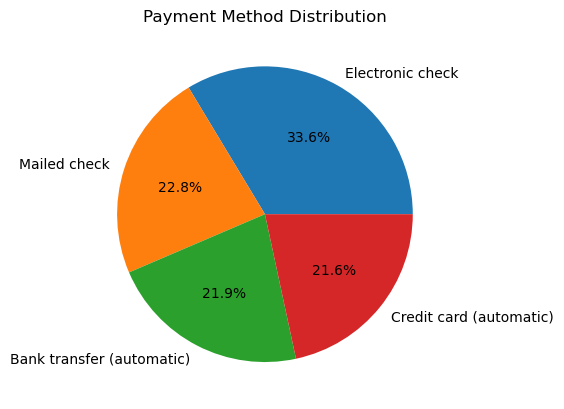

In [91]:
plt.pie(x = df['payment_method'].value_counts(), labels = df['payment_method'].value_counts().index, autopct = '%1.1f%%' , startangle = 360)
plt.title("Payment Method Distribution")

In [92]:
df["payment_method"].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: payment_method, dtype: int64

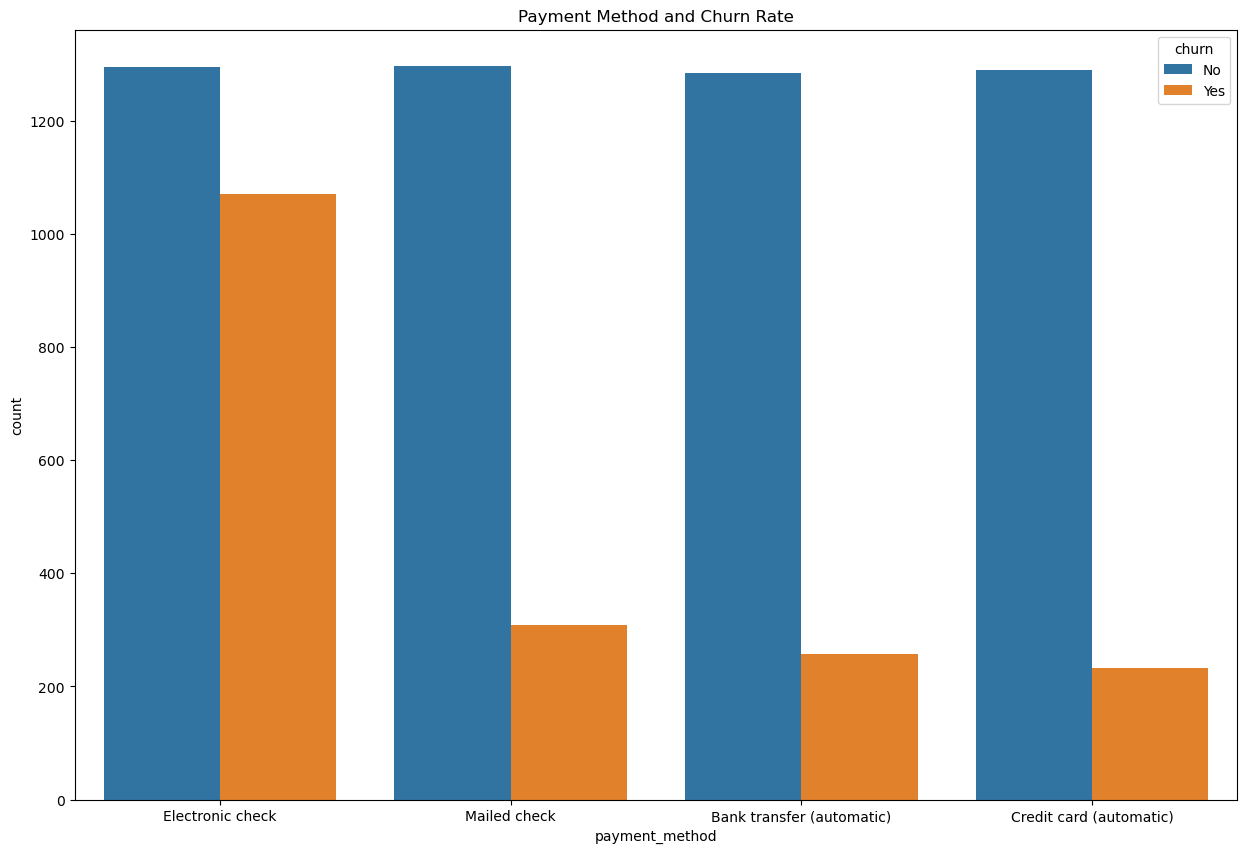

In [93]:
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'payment_method', hue = 'churn')
plt.title('Payment Method and Churn Rate')
plt.show()

In [94]:
value_counts = df.groupby(['payment_method', 'churn']).size().reset_index(name='Count')
print(value_counts)

              payment_method churn  Count
0  Bank transfer (automatic)    No   1284
1  Bank transfer (automatic)   Yes    258
2    Credit card (automatic)    No   1289
3    Credit card (automatic)   Yes    232
4           Electronic check    No   1294
5           Electronic check   Yes   1071
6               Mailed check    No   1296
7               Mailed check   Yes    308


Pelanggan dengan metode pembayaran Electronic Check (e-wallet misal paypal/qris) memiliki tingkat churn yang paling tinggi (1071), diikuti oleh Mailed Check (308), Bank Transfer (258), dan Credit Card (232). Rasio churn terhadap total pelanggan tampak lebih tinggi pada pelanggan dengan metode pembayaran Electronic Check (45.4%) dan Mailed Check (19.2%) dibandingkan dengan Bank Transfer (16.7%) dan Credit Card (15.2%). Meskipun electronic check memberikan kemudahan karena tidak memerlukan kertas fisik dan dapat dilakukan secara online, namun seringkali diidentifikasi dengan tingkat risiko churn yang lebih tinggi dalam beberapa bisnis karena dapat terkait dengan masalah pembayaran tidak lancar atau penolakan pembayaran. Electronic check juga dapat terkena biaya transaksi yang lebih tinggi dibandingkan dengan metode pembayaran otomatis lainnya, seperti kartu kredit atau transfer bank otomatis. sehingga dari data di atas dapat disarankan untuk melakukan Evaluasi dan perbarui layanan pembayaran untuk memasukkan alternatif metode pembayaran yang lebih stabil.
Tawarkan berbagai opsi pembayaran untuk memenuhi preferensi pelanggan. bisa juga dengan melakukan edukasi untuk memdorong pelanggan untuk beralih ke metode pembayaran yang lebih stabil, seperti Bank Transfer atau Credit Card, dengan menawarkan insentif atau diskon khusus.
Jelaskan keuntungan dan keamanan menggunakan metode pembayaran otomatis.

In [95]:
churned_contractpayment_counts = churned[['contract', 'payment_method']].value_counts()
churned_contractpayment_counts

contract        payment_method           
Month-to-month  Electronic check             994
                Mailed check                 282
                Bank transfer (automatic)    201
                Credit card (automatic)      178
One year        Electronic check              64
                Credit card (automatic)       41
                Bank transfer (automatic)     38
                Mailed check                  23
Two year        Bank transfer (automatic)     19
                Credit card (automatic)       13
                Electronic check              13
                Mailed check                   3
dtype: int64

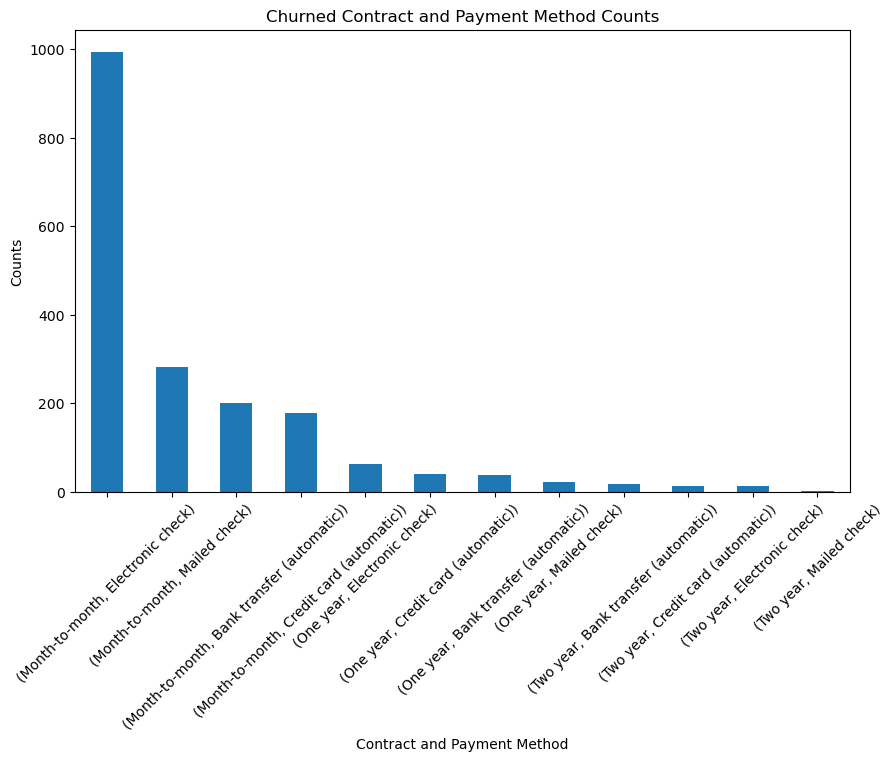

In [96]:
churned_contractpayment_counts = churned[['contract', 'payment_method']].value_counts()

# bar chart
plt.figure(figsize=(10, 6))
churned_contractpayment_counts.plot(kind='bar')
plt.title('Churned Contract and Payment Method Counts')
plt.xlabel('Contract and Payment Method')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

dari data di atas diketahui bahwa pelanggan dengan kontrak jangka panjang cenderung lebih setia sehingga untuk mengatasi pelanggan yang memutuskan berlangganan dalam waktu bulanan dapat disarankan untuk merancang strategi dalam menawarkan insentif khusus kepada pelanggan dengan kontrak. Misalnya, dapat memberikan diskon bulanan atau bonus layanan tambahan kecepatan download selama awal 3 bulan pertama untuk pelanggan yang setuju berkomitmen dalam jangka panjang atau bisa juga diberikan Penawaran Khusus untuk Kontrak Jangka Panjang dengan bayar tahunan secara cash dengan harga yang jauh lebih murah dari bayar bulanan 

selain itu dari data diatas juga terlihat Jika hasil segmentasi menunjukkan bahwa pelanggan dengan metode pembayaran electronic check lebih cenderung untuk churn, oleh karena itu dapat dipertimbangkan untuk menyederhanakan proses pembayaran untuk mereka. Misalnya, dapat menawarkan opsi pembayaran otomatis yang nyaman atau pengingat pembayaran tepat waktu.

Dengan pemahaman yang lebih mendalam tentang preferensi pelanggan dalam setiap kelompok, dapat juga disarankan untuk merancang layanan tambahan atau peningkatan yang sesuai. seperti aplikasi handphone untuk memudahkan customer dalam mengelola pembayaran dan upgrade atau menurunkan paket internet yang digunakan

Menyesuaikan strategi pemasaran berdasarkan jenis layanan yang akan diberkan kepada pelanggan misalnya layanan internet untuk customer individu atau yang sudah berkeluarga, menyesuaikan harga paket untuk masing-masing kelompok agar meminimalisir churn, kemudian menyesuaikan paket sesuai kebutuhan customer, misal butuh internet yang cepat untuk download atau lebih ke stabilan internet untuk bermain game.

Melakukan Pemantauan dan Evaluasi Terus-Menerus: Pantau kinerja layanan secara terus-menerus dan memperbarui strategi retensi berdasarkan perubahan tren dan kebutuhan pelanggan.